In [1]:
import os
import pandas as pd
from pandas import read_csv
from datetime import datetime
os.chdir(r"C:\Users\USER\Desktop\ETo data")
data = read_csv('Sepeteri.csv', header = 6, names = ['Date', 'Temp min', 'Temp max', 'Wind speed', 'Sunlight hours','Solar Radiation', 'ETo'])
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
df = data['Sunlight hours']






### Checking for missing values

In [2]:
print(data.isnull())
print(data.isnull().any())

            Temp min  Temp max  Wind speed  Sunlight hours  Solar Radiation  \
Date                                                                          
1979-01-01     False     False       False           False            False   
1979-02-01     False     False       False           False            False   
1979-03-01     False     False       False           False            False   
1979-04-01     False     False       False           False            False   
1979-05-01     False     False       False           False            False   
...              ...       ...         ...             ...              ...   
2016-10-01     False     False       False           False            False   
2016-11-01     False     False       False           False            False   
2016-12-01     False     False       False           False            False   
2017-01-01     False     False       False           False            False   
2017-02-01     False     False       False          

### Importing the necessary libraries

In [3]:
import math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import statistics
from scipy import stats
import plotly.express as px
from sklearn.metrics import mean_squared_error


C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Plotting the variables for analysis

array([[<AxesSubplot:title={'center':'Temp min'}>,
        <AxesSubplot:title={'center':'Temp max'}>],
       [<AxesSubplot:title={'center':'Wind speed'}>,
        <AxesSubplot:title={'center':'Sunlight hours'}>],
       [<AxesSubplot:title={'center':'Solar Radiation'}>,
        <AxesSubplot:title={'center':'ETo'}>]], dtype=object)

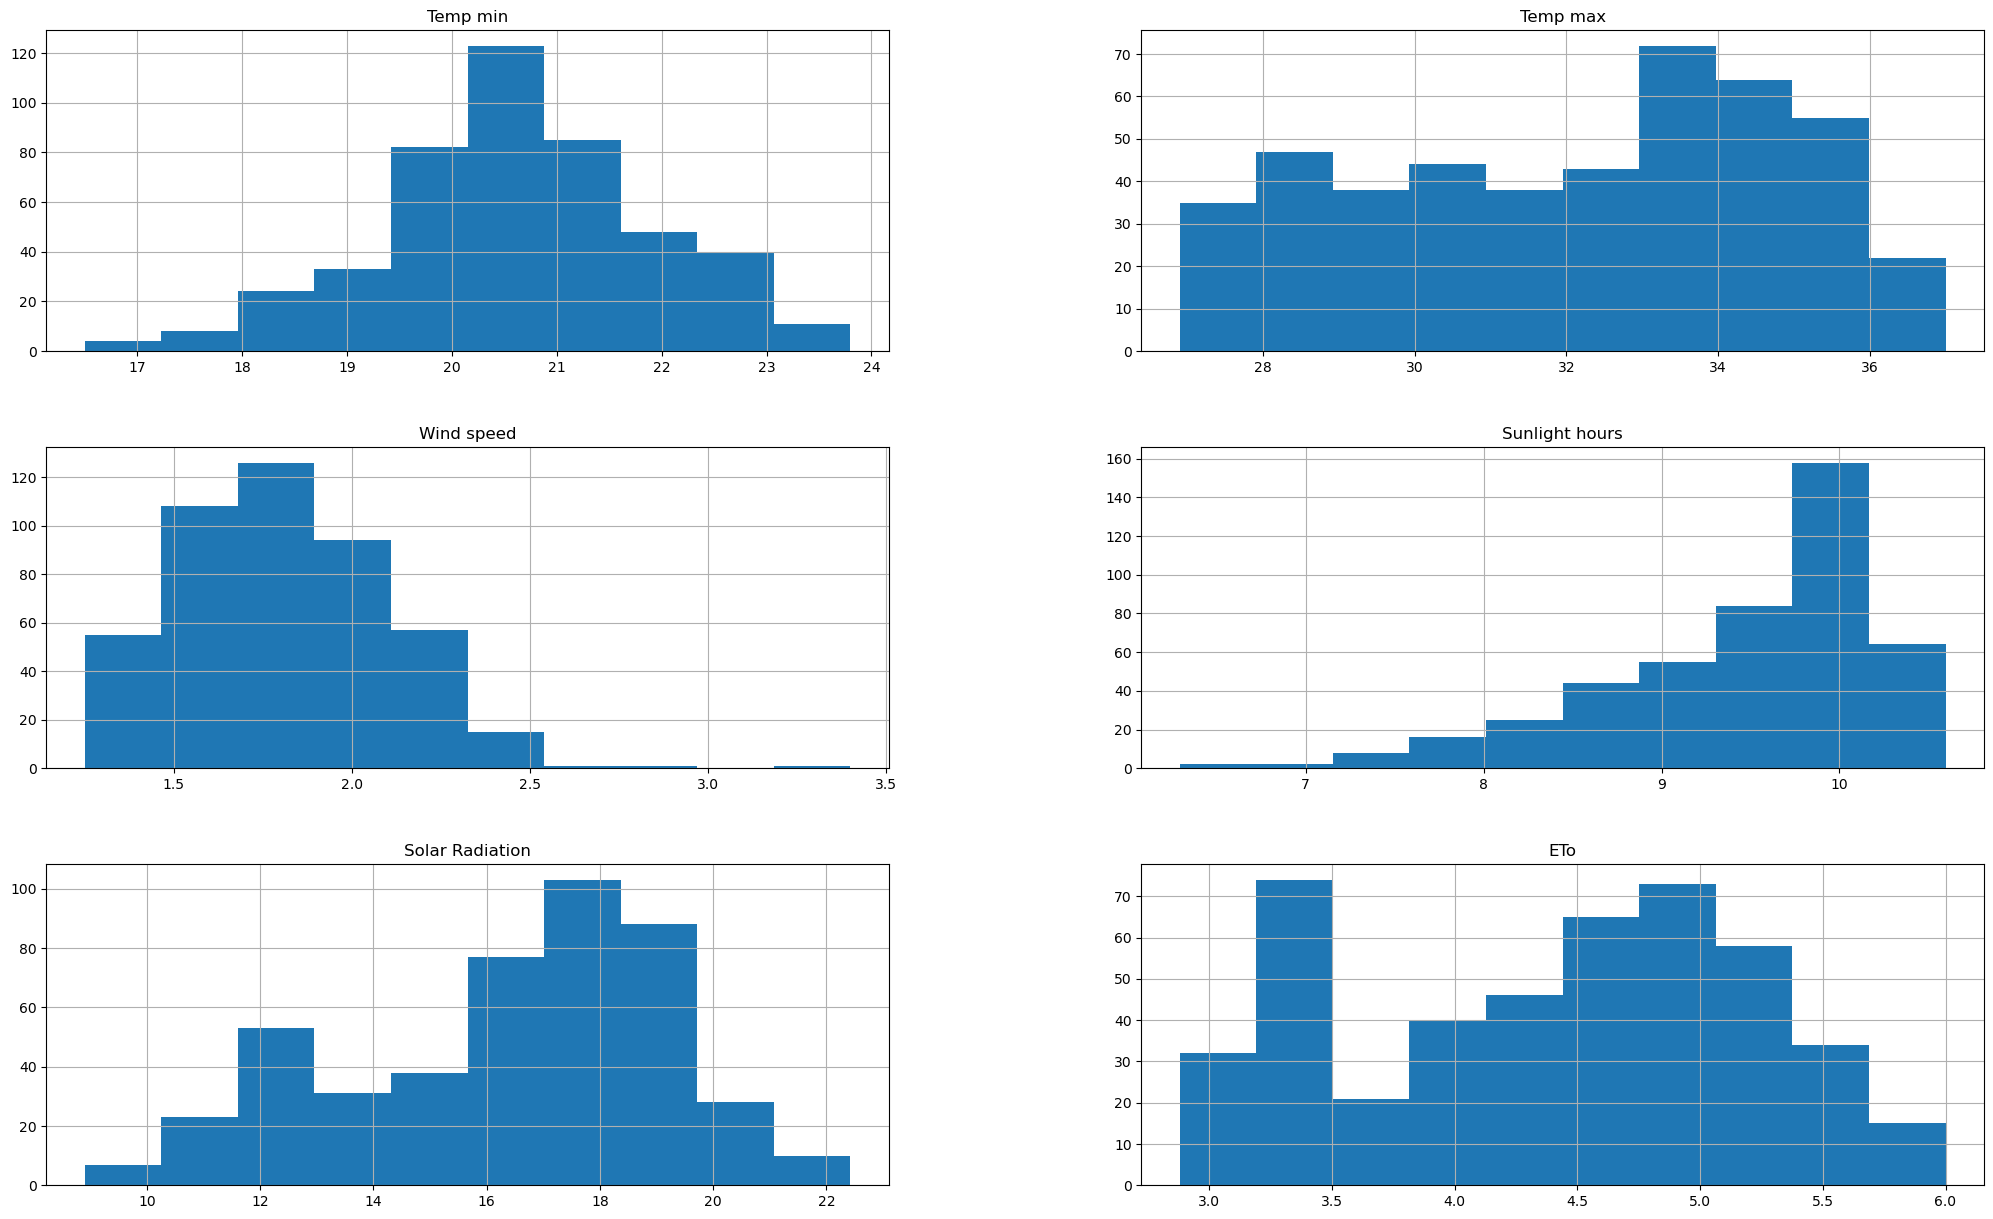

In [4]:
data.hist(figsize=(25,15))

<AxesSubplot:>

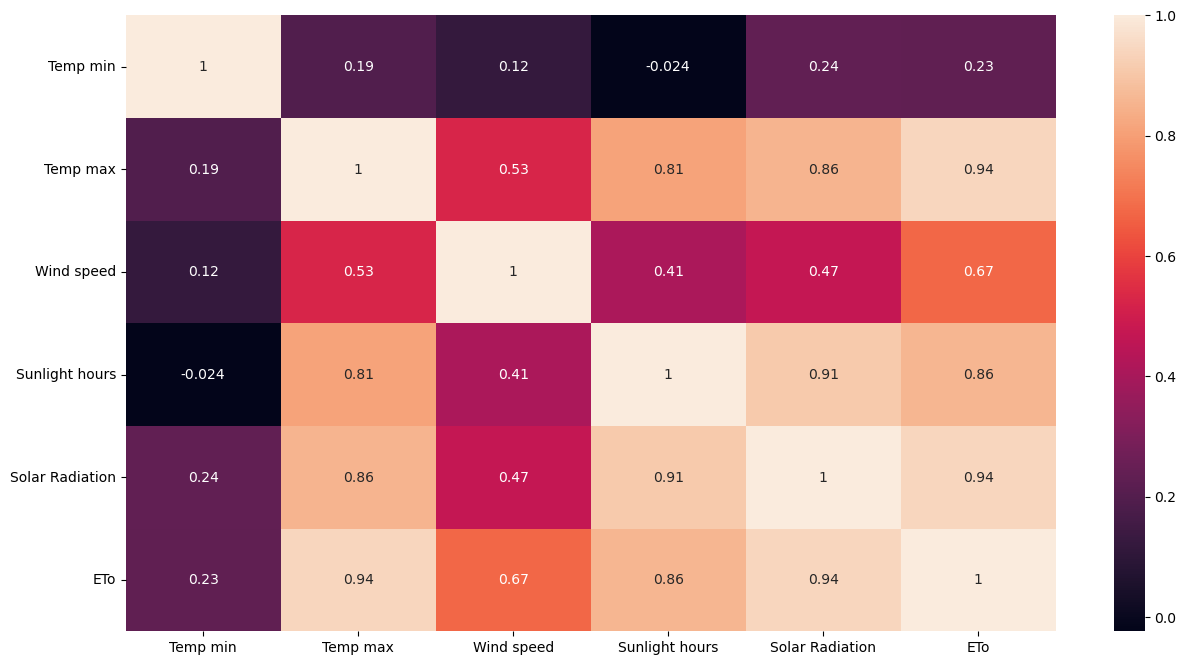

In [5]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, cmap="rocket")

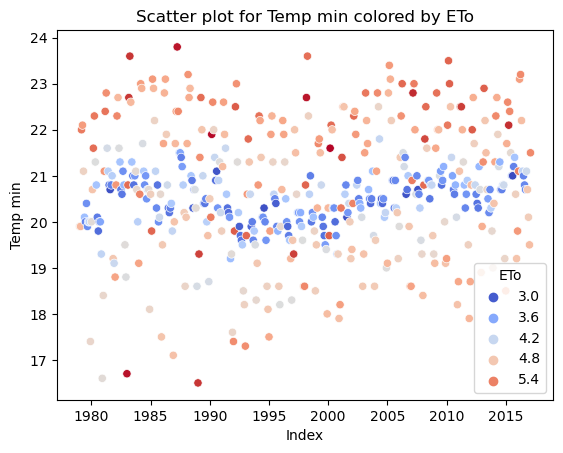

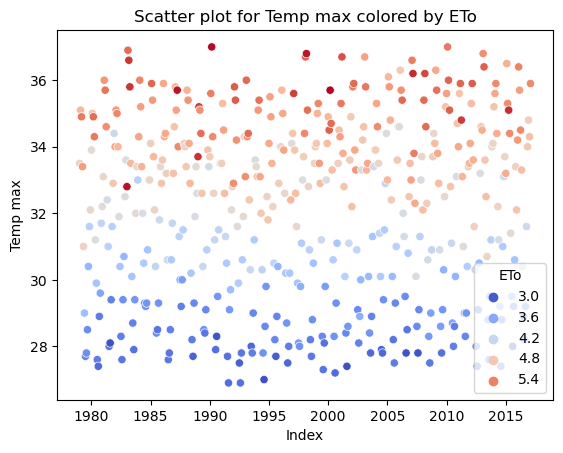

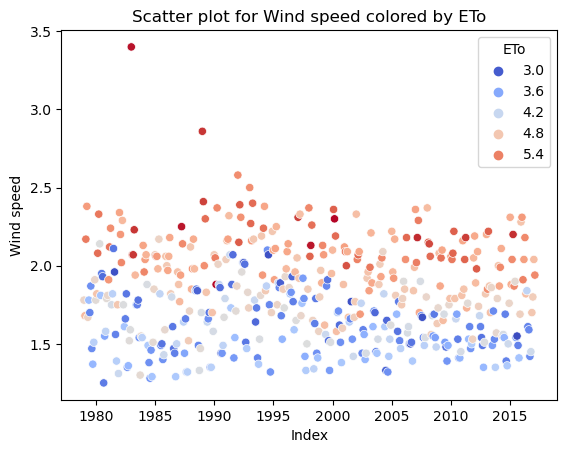

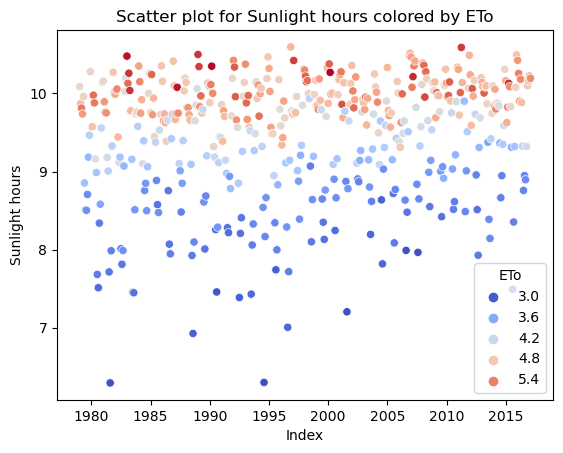

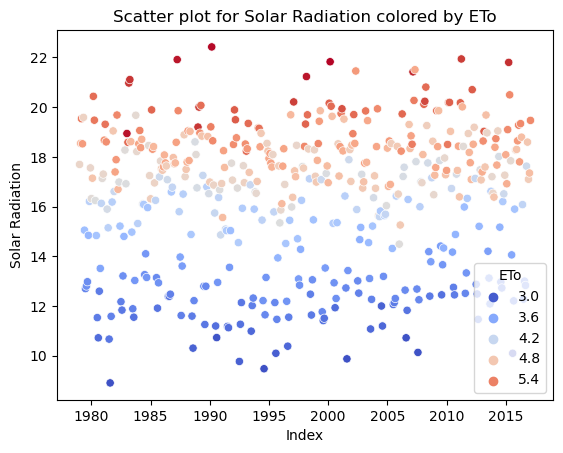

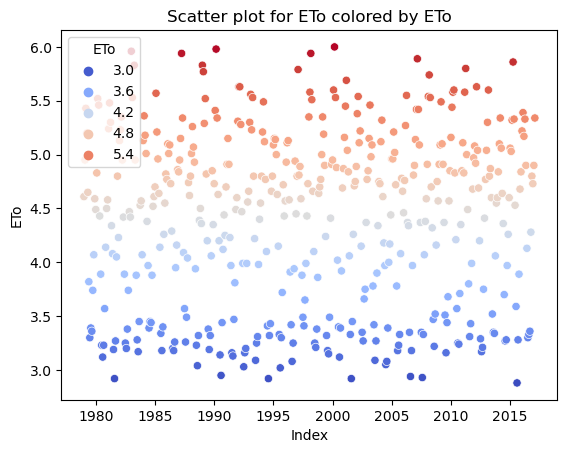

In [6]:
numerical_columns = [col for col in data.columns if data[col].dtype != 'O' and col != 'Date']

for feature in numerical_columns:
    sns.scatterplot(x=data.index, y=data[feature], hue=data['ETo'], palette='coolwarm')
    plt.title(f'Scatter plot for {feature} colored by ETo')
    plt.xlabel('Index')
    plt.ylabel(feature)
    plt.show()

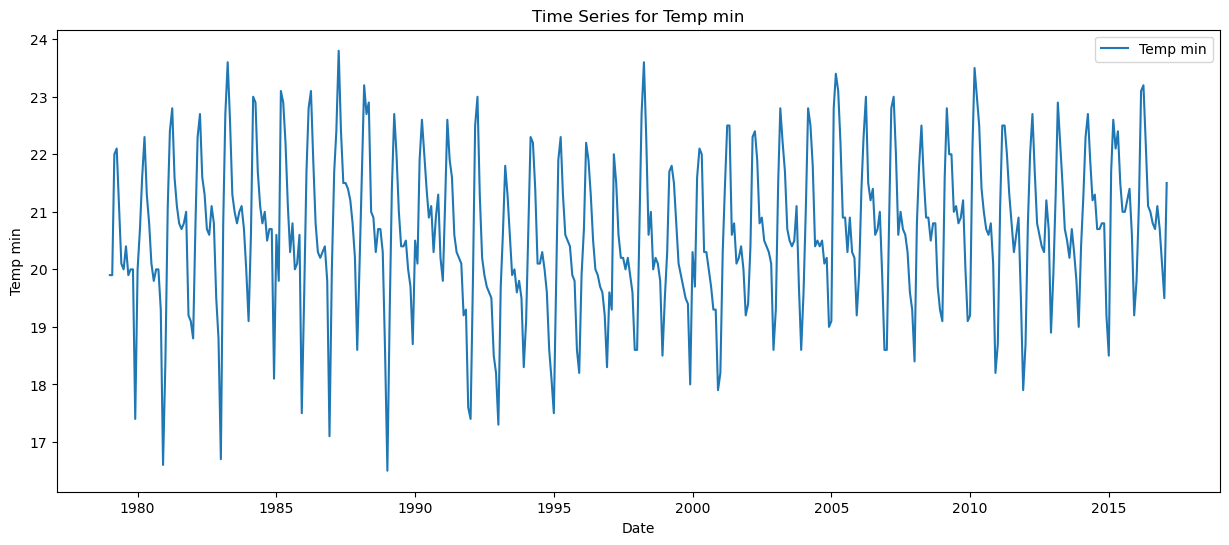

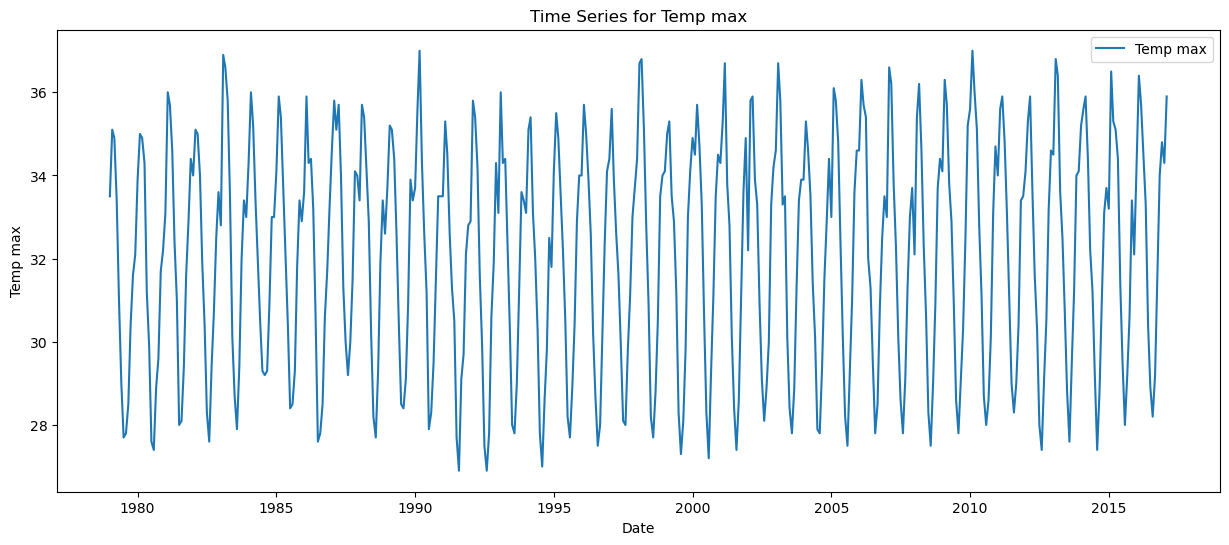

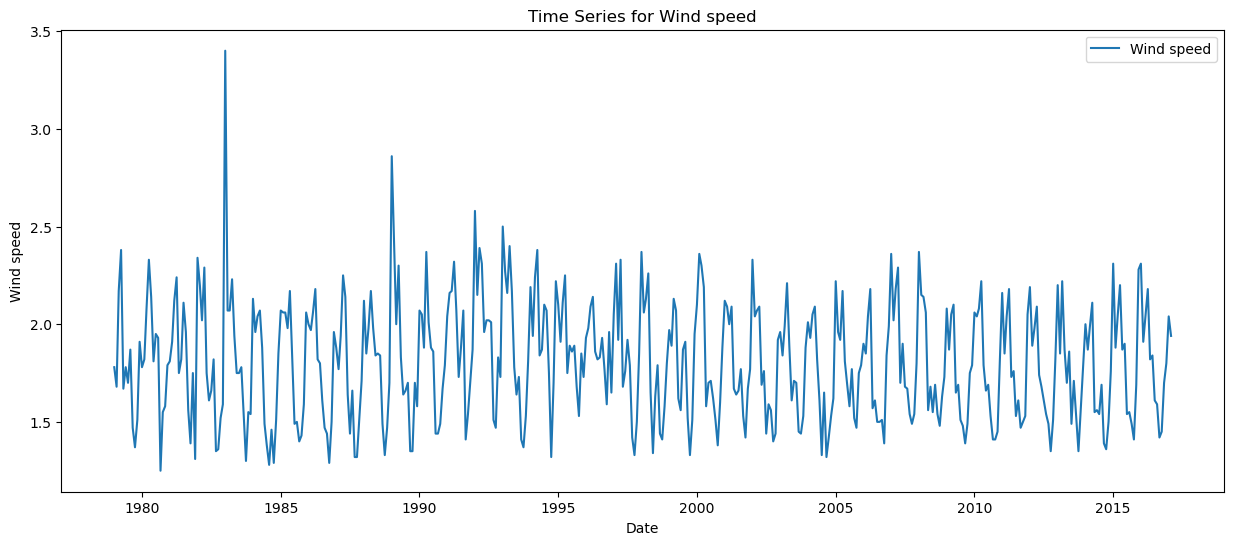

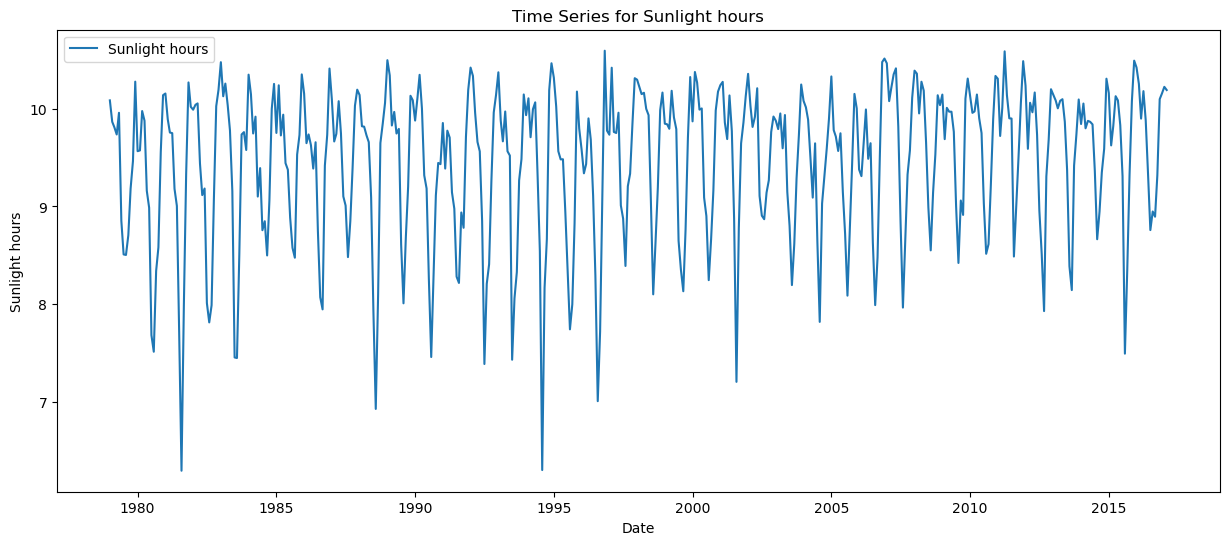

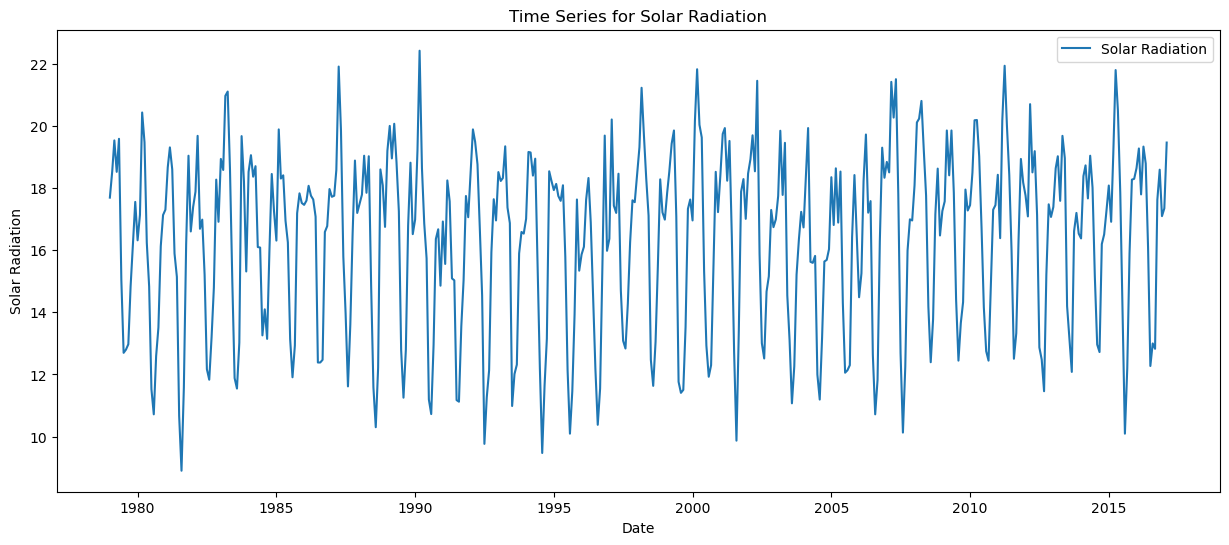

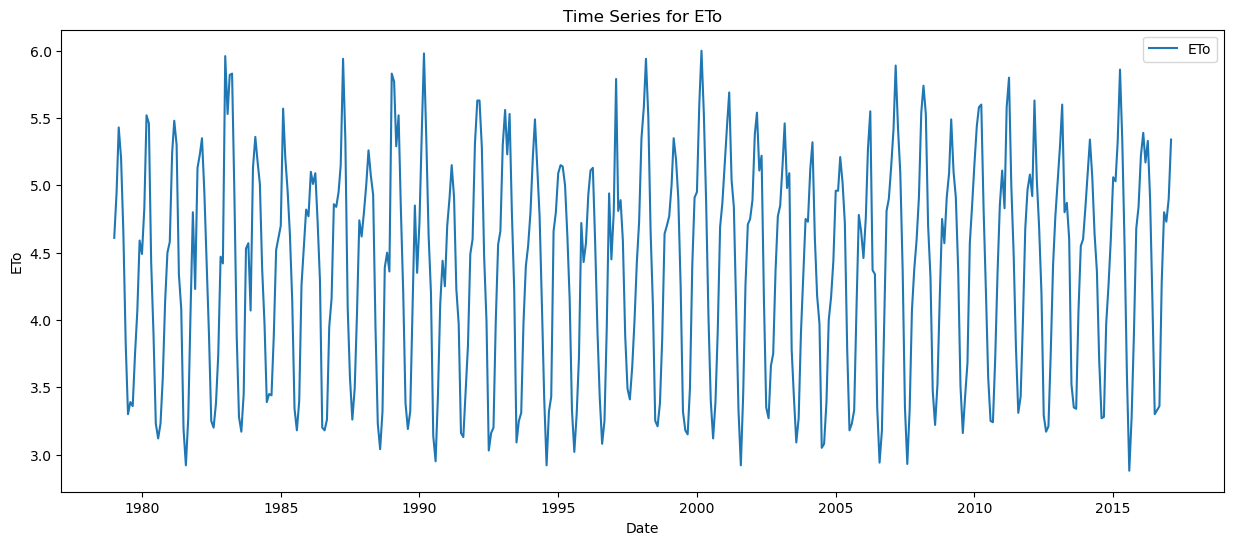

In [7]:
#Time series plot
numerical_columns = [col for col in data.columns if data[col].dtype != 'O' and col != 'date']
for feature in numerical_columns:
    plt.figure(figsize=(15, 6))
    plt.plot(data.index, data[feature], label=feature)
    plt.title(f'Time Series for {feature}')
    plt.xlabel('Date')
    plt.ylabel(feature)
    plt.legend()
    plt.show()

In [8]:
#Setting the input features and target variable

x = data[['Temp min', 'Temp max', 'Wind speed', 'Sunlight hours','Solar Radiation']].values
y = data['ETo'].values

# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (274, 5)
the shape of the training set (target) is: (274,)

the shape of the cross validation set (input) is: (92, 5)
the shape of the cross validation set (target) is: (92,)

the shape of the test set (input) is: (92, 5)
the shape of the test set (target) is: (92,)


In [9]:
import Utils
tf.get_logger().setLevel('ERROR')
tf.autograph.set_verbosity(0)


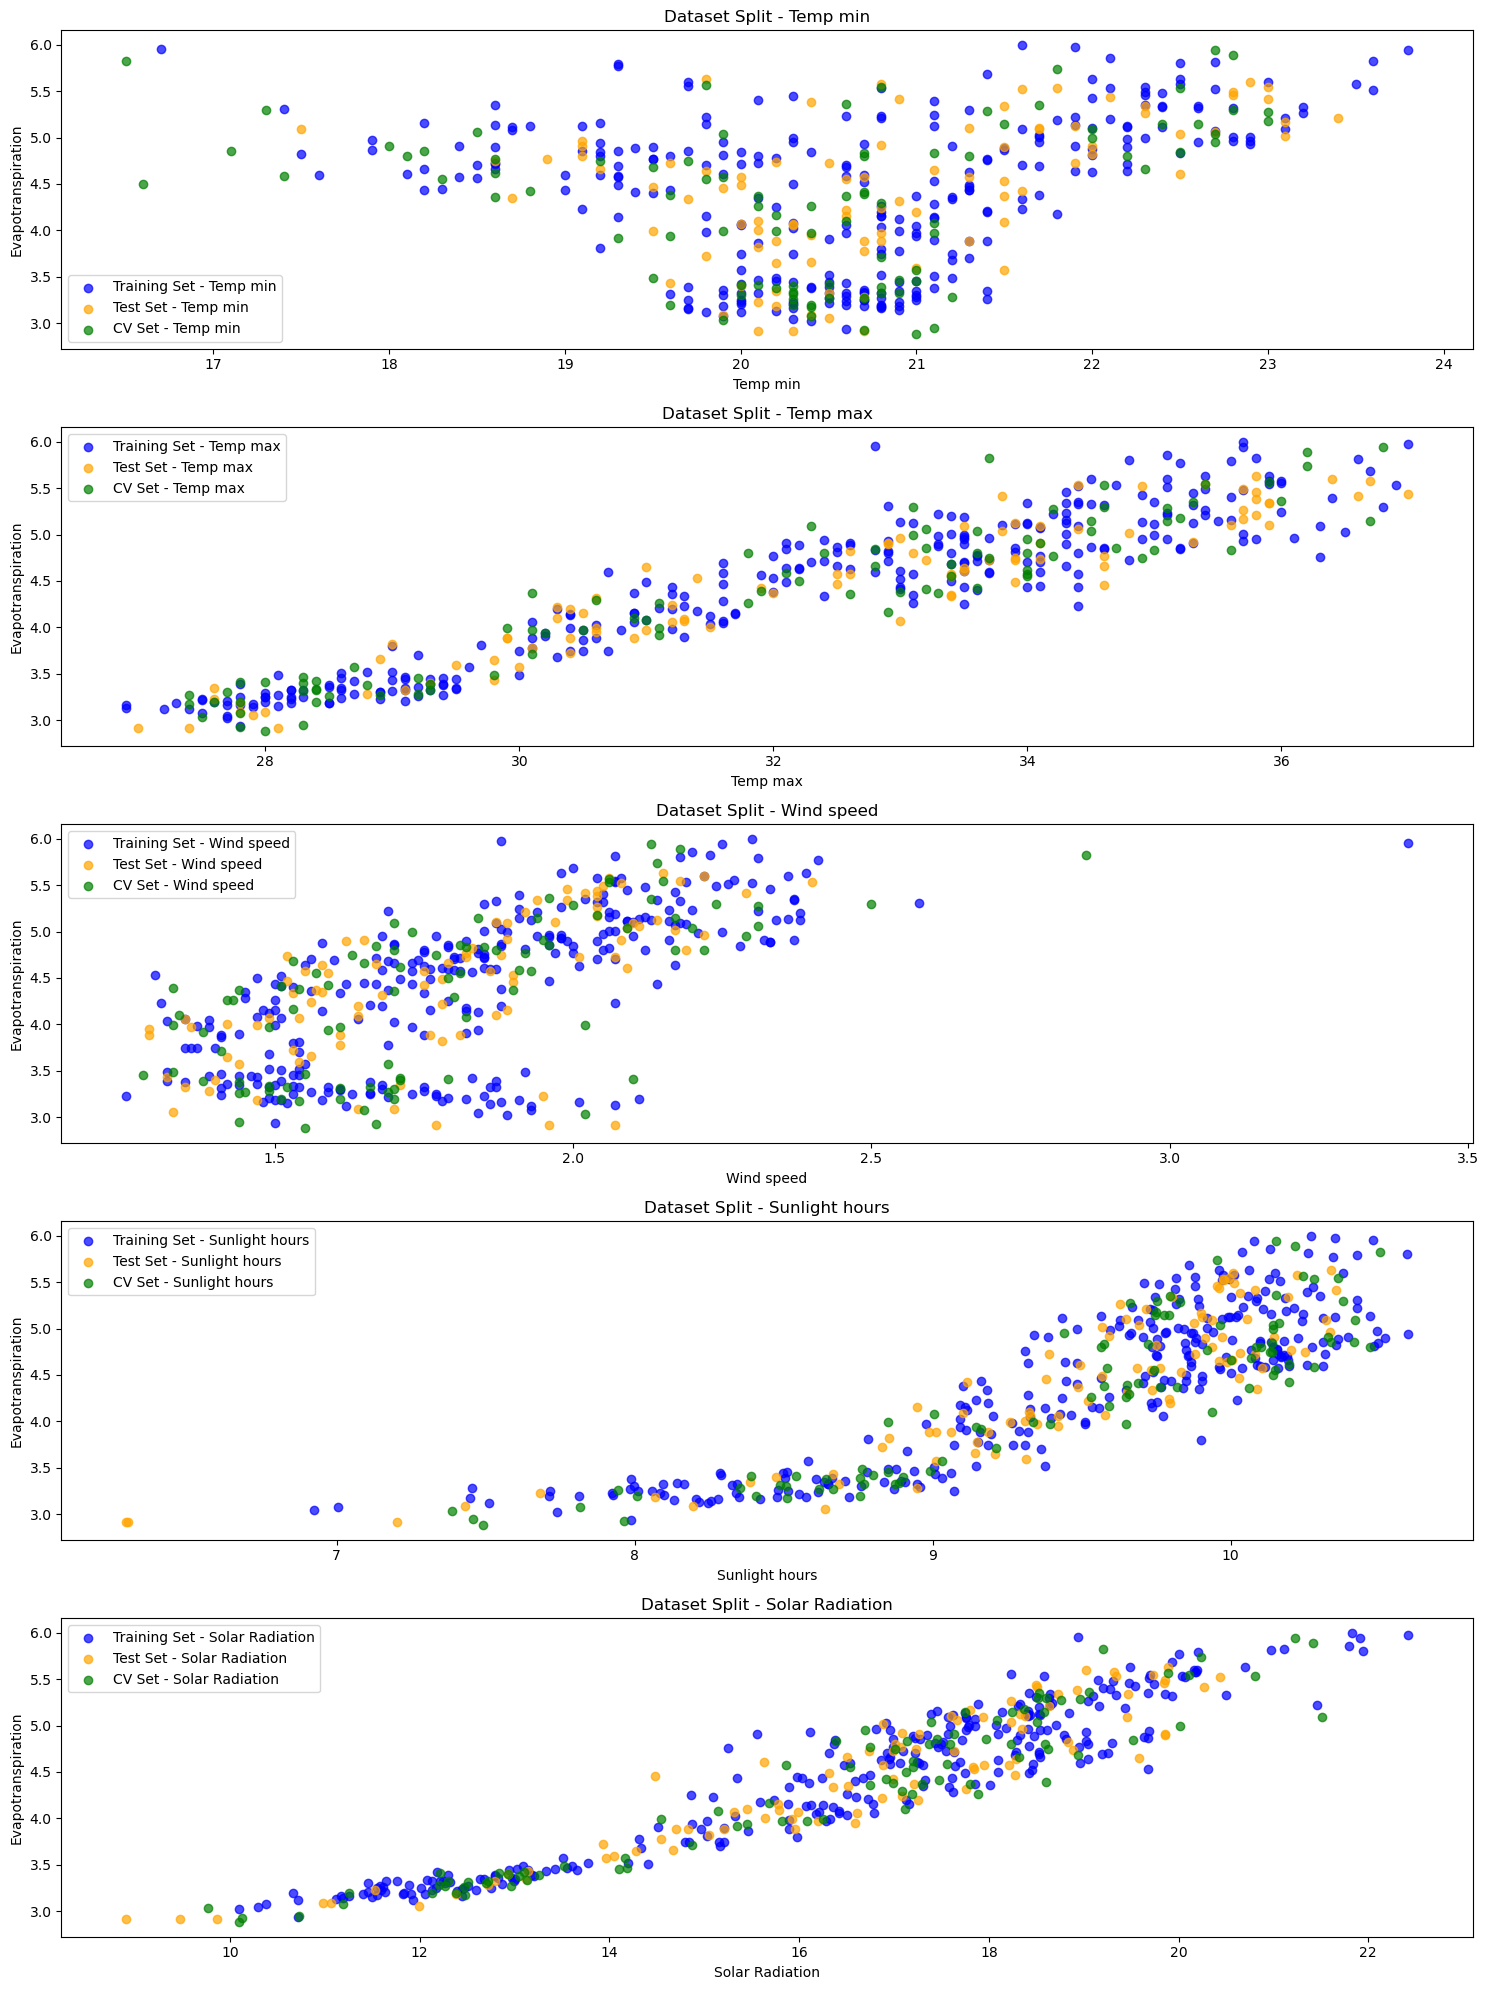

In [10]:
import numpy as np
from Utils import plot_dataset_split

features = ['Temp min', 'Temp max', 'Wind speed', 'Sunlight hours','Solar Radiation'] 
plot_dataset_split(x_train, x_test, x_cv, y_train, y_test, y_cv, features)

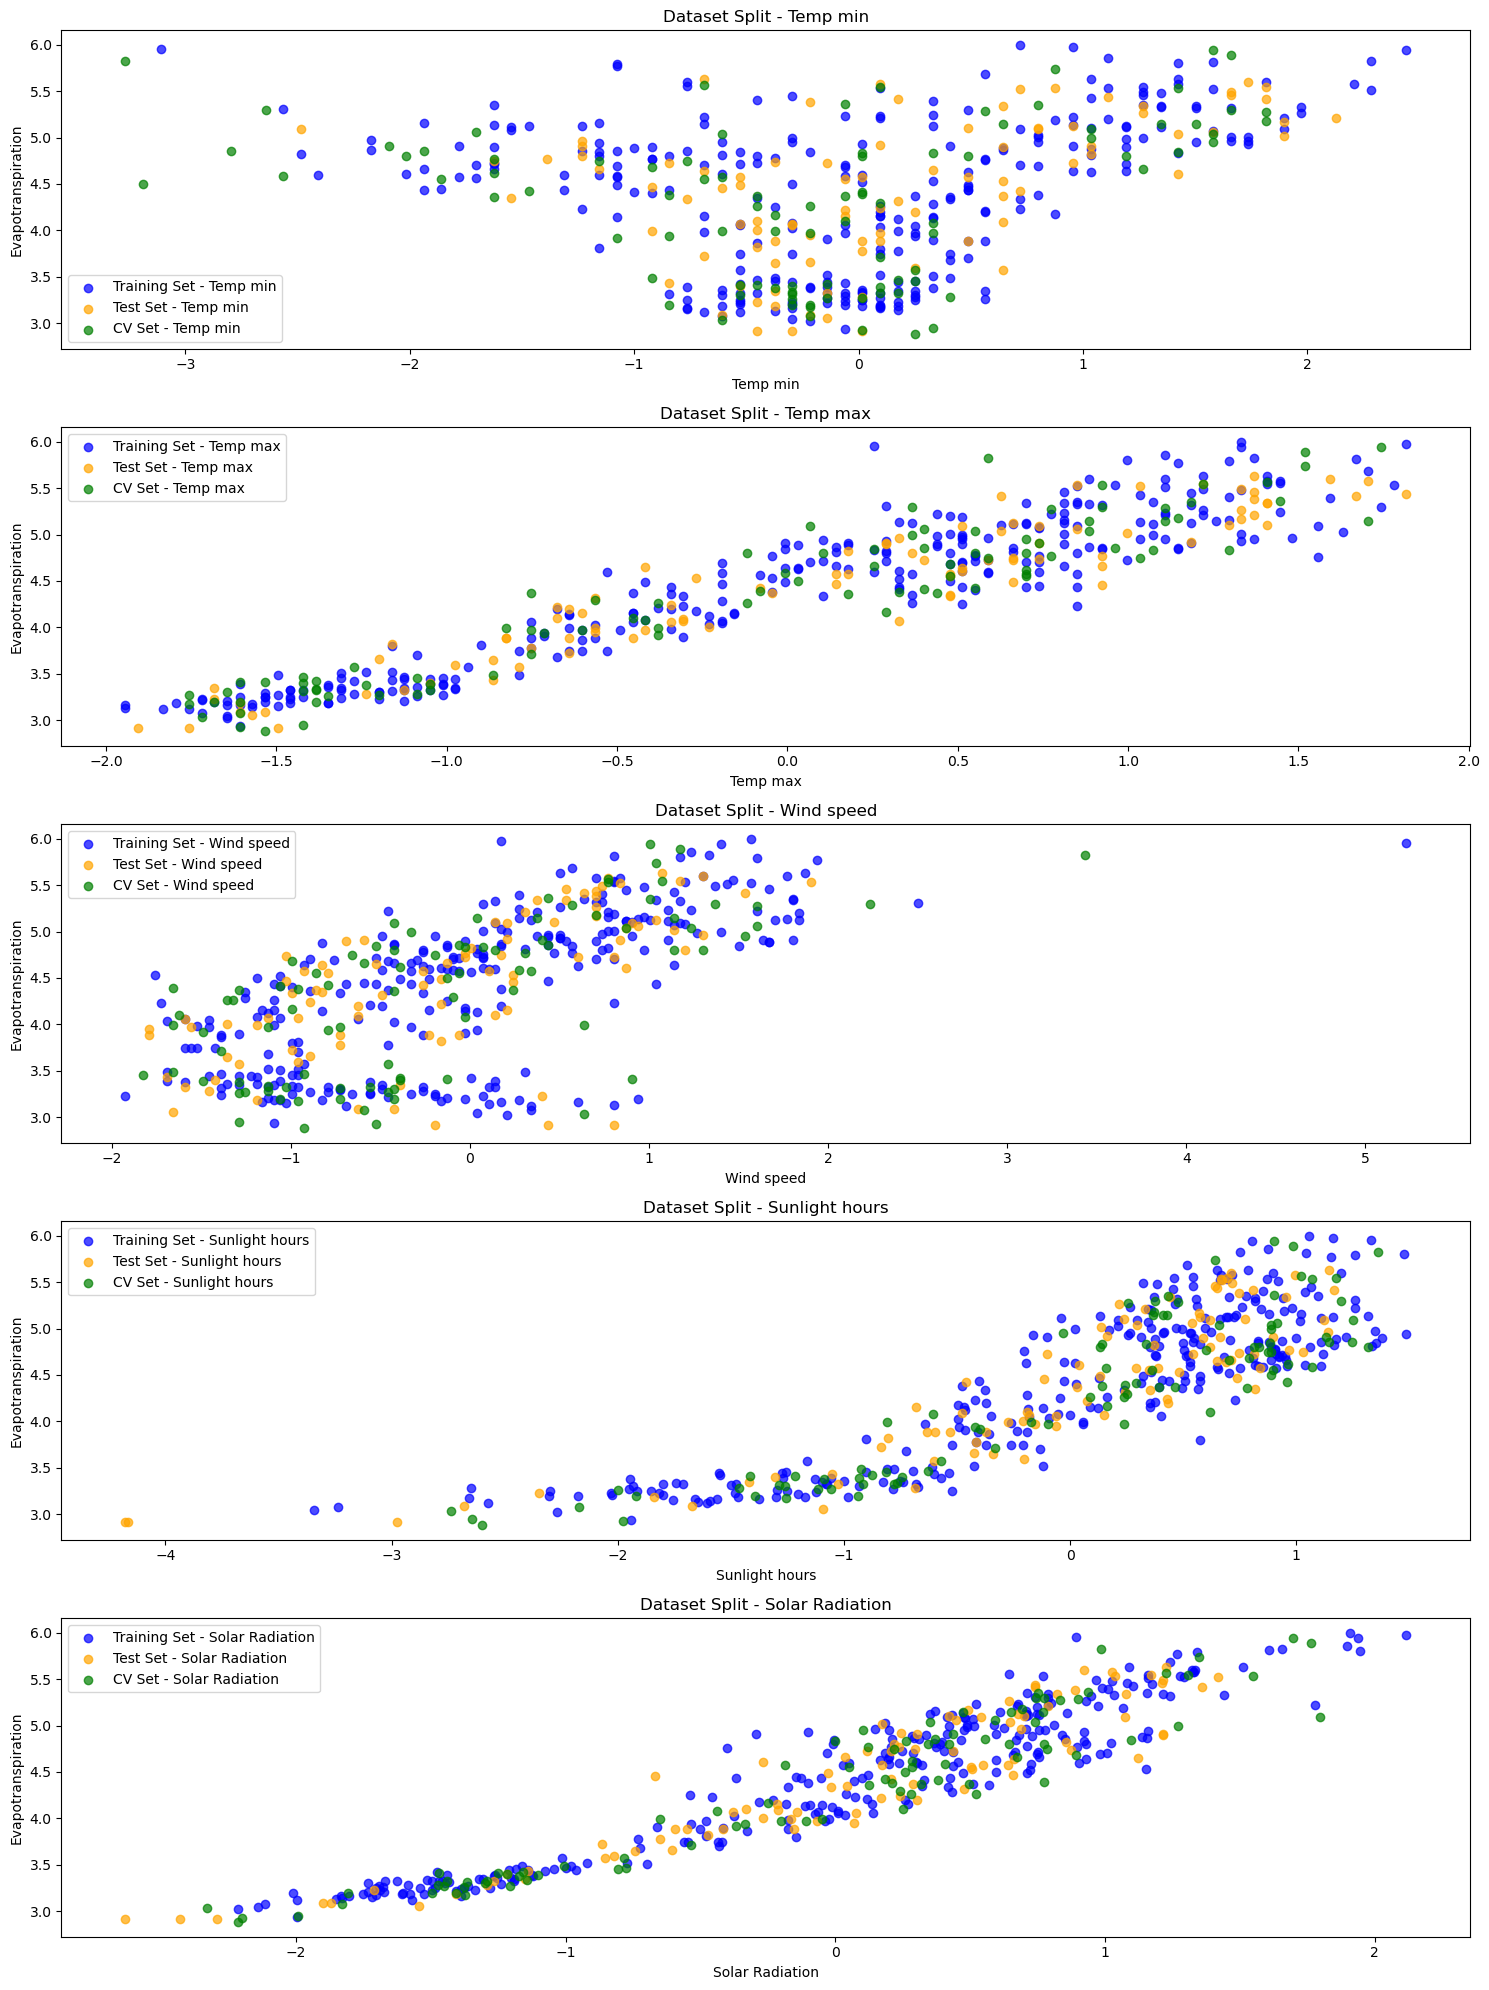

In [11]:
#Scaling the input features

np.set_printoptions(precision=2)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_cv_scaled = scaler.transform(x_cv)
x_test_scaled = scaler.transform(x_test)
plot_dataset_split(x_train_scaled, x_test_scaled, x_cv_scaled, y_train, y_test, y_cv, features)

### Neural Network Training
### Model 1: All input features

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

lambdas = [0, 0.01, 0.03, 0.1, 0.2, 0.35]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(25, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(1, activation = 'linear')
        ]
    )
    models[i].compile(
        loss='mse',
        optimizer = 'adam',
        metrics = ['mae']
    )

    history = models[i].fit(
    x_train_scaled, y_train,
    epochs=150
)
    print(f"Finished lambda = {lambda_}")

Epoch 1/150
9/9 [==============================] - 1s 5ms/step - loss: 22.9957 - mae: 4.6716
Epoch 2/150
9/9 [==============================] - 0s 3ms/step - loss: 21.5796 - mae: 4.5229
Epoch 3/150
9/9 [==============================] - 0s 4ms/step - loss: 20.1930 - mae: 4.3758
Epoch 4/150
9/9 [==============================] - 0s 3ms/step - loss: 18.9070 - mae: 4.2314
Epoch 5/150
9/9 [==============================] - 0s 3ms/step - loss: 17.6749 - mae: 4.0891
Epoch 6/150
9/9 [==============================] - 0s 3ms/step - loss: 16.4937 - mae: 3.9473
Epoch 7/150
9/9 [==============================] - 0s 3ms/step - loss: 15.3775 - mae: 3.8075
Epoch 8/150
9/9 [==============================] - 0s 3ms/step - loss: 14.2927 - mae: 3.6678
Epoch 9/150
9/9 [==============================] - 0s 3ms/step - loss: 13.2554 - mae: 3.5287
Epoch 10/150
9/9 [==============================] - 0s 3ms/step - loss: 12.2481 - mae: 3.3885
Epoch 11/150
9/9 [==============================] - 0s 3ms/step - los

9/9 [==============================] - 0s 3ms/step - loss: 0.3640 - mae: 0.4621
Epoch 90/150
9/9 [==============================] - 0s 3ms/step - loss: 0.3580 - mae: 0.4584
Epoch 91/150
9/9 [==============================] - 0s 3ms/step - loss: 0.3528 - mae: 0.4552
Epoch 92/150
9/9 [==============================] - 0s 3ms/step - loss: 0.3468 - mae: 0.4516
Epoch 93/150
9/9 [==============================] - 0s 3ms/step - loss: 0.3416 - mae: 0.4482
Epoch 94/150
9/9 [==============================] - 0s 3ms/step - loss: 0.3360 - mae: 0.4446
Epoch 95/150
9/9 [==============================] - 0s 3ms/step - loss: 0.3307 - mae: 0.4413
Epoch 96/150
9/9 [==============================] - 0s 3ms/step - loss: 0.3250 - mae: 0.4377
Epoch 97/150
9/9 [==============================] - 0s 3ms/step - loss: 0.3197 - mae: 0.4344
Epoch 98/150
9/9 [==============================] - 0s 3ms/step - loss: 0.3143 - mae: 0.4305
Epoch 99/150
9/9 [==============================] - 0s 3ms/step - loss: 0.3094 - ma

9/9 [==============================] - 0s 3ms/step - loss: 1.6452 - mae: 0.9789
Epoch 27/150
9/9 [==============================] - 0s 3ms/step - loss: 1.5737 - mae: 0.9529
Epoch 28/150
9/9 [==============================] - 0s 3ms/step - loss: 1.5086 - mae: 0.9294
Epoch 29/150
9/9 [==============================] - 0s 4ms/step - loss: 1.4532 - mae: 0.9088
Epoch 30/150
9/9 [==============================] - 0s 4ms/step - loss: 1.3990 - mae: 0.8895
Epoch 31/150
9/9 [==============================] - 0s 5ms/step - loss: 1.3489 - mae: 0.8713
Epoch 32/150
9/9 [==============================] - 0s 3ms/step - loss: 1.3032 - mae: 0.8544
Epoch 33/150
9/9 [==============================] - 0s 4ms/step - loss: 1.2626 - mae: 0.8387
Epoch 34/150
9/9 [==============================] - 0s 5ms/step - loss: 1.2185 - mae: 0.8209
Epoch 35/150
9/9 [==============================] - 0s 4ms/step - loss: 1.1790 - mae: 0.8051
Epoch 36/150
9/9 [==============================] - 0s 4ms/step - loss: 1.1442 - ma

9/9 [==============================] - 0s 3ms/step - loss: 0.1970 - mae: 0.2501
Epoch 115/150
9/9 [==============================] - 0s 3ms/step - loss: 0.1940 - mae: 0.2470
Epoch 116/150
9/9 [==============================] - 0s 2ms/step - loss: 0.1913 - mae: 0.2441
Epoch 117/150
9/9 [==============================] - 0s 3ms/step - loss: 0.1883 - mae: 0.2410
Epoch 118/150
9/9 [==============================] - 0s 3ms/step - loss: 0.1856 - mae: 0.2379
Epoch 119/150
9/9 [==============================] - 0s 3ms/step - loss: 0.1827 - mae: 0.2350
Epoch 120/150
9/9 [==============================] - 0s 3ms/step - loss: 0.1803 - mae: 0.2323
Epoch 121/150
9/9 [==============================] - 0s 3ms/step - loss: 0.1776 - mae: 0.2293
Epoch 122/150
9/9 [==============================] - 0s 3ms/step - loss: 0.1751 - mae: 0.2266
Epoch 123/150
9/9 [==============================] - 0s 3ms/step - loss: 0.1725 - mae: 0.2238
Epoch 124/150
9/9 [==============================] - 0s 4ms/step - loss: 0

9/9 [==============================] - 0s 3ms/step - loss: 1.0746 - mae: 0.6698
Epoch 52/150
9/9 [==============================] - 0s 3ms/step - loss: 1.0496 - mae: 0.6576
Epoch 53/150
9/9 [==============================] - 0s 3ms/step - loss: 1.0260 - mae: 0.6464
Epoch 54/150
9/9 [==============================] - 0s 3ms/step - loss: 1.0043 - mae: 0.6358
Epoch 55/150
9/9 [==============================] - 0s 3ms/step - loss: 0.9826 - mae: 0.6257
Epoch 56/150
9/9 [==============================] - 0s 3ms/step - loss: 0.9634 - mae: 0.6163
Epoch 57/150
9/9 [==============================] - 0s 3ms/step - loss: 0.9443 - mae: 0.6080
Epoch 58/150
9/9 [==============================] - 0s 3ms/step - loss: 0.9252 - mae: 0.5989
Epoch 59/150
9/9 [==============================] - 0s 3ms/step - loss: 0.9084 - mae: 0.5910
Epoch 60/150
9/9 [==============================] - 0s 3ms/step - loss: 0.8898 - mae: 0.5818
Epoch 61/150
9/9 [==============================] - 0s 3ms/step - loss: 0.8754 - ma

9/9 [==============================] - 0s 3ms/step - loss: 0.2459 - mae: 0.2252
Epoch 139/150
9/9 [==============================] - 0s 3ms/step - loss: 0.2422 - mae: 0.2222
Epoch 140/150
9/9 [==============================] - 0s 2ms/step - loss: 0.2387 - mae: 0.2195
Epoch 141/150
9/9 [==============================] - 0s 3ms/step - loss: 0.2350 - mae: 0.2165
Epoch 142/150
9/9 [==============================] - 0s 3ms/step - loss: 0.2313 - mae: 0.2130
Epoch 143/150
9/9 [==============================] - 0s 5ms/step - loss: 0.2278 - mae: 0.2100
Epoch 144/150
9/9 [==============================] - 0s 4ms/step - loss: 0.2244 - mae: 0.2070
Epoch 145/150
9/9 [==============================] - 0s 3ms/step - loss: 0.2211 - mae: 0.2042
Epoch 146/150
9/9 [==============================] - 0s 3ms/step - loss: 0.2177 - mae: 0.2013
Epoch 147/150
9/9 [==============================] - 0s 2ms/step - loss: 0.2146 - mae: 0.1983
Epoch 148/150
9/9 [==============================] - 0s 3ms/step - loss: 0

9/9 [==============================] - 0s 3ms/step - loss: 1.0975 - mae: 0.5078
Epoch 76/150
9/9 [==============================] - 0s 3ms/step - loss: 1.0770 - mae: 0.5011
Epoch 77/150
9/9 [==============================] - 0s 3ms/step - loss: 1.0566 - mae: 0.4949
Epoch 78/150
9/9 [==============================] - 0s 3ms/step - loss: 1.0364 - mae: 0.4886
Epoch 79/150
9/9 [==============================] - 0s 2ms/step - loss: 1.0164 - mae: 0.4819
Epoch 80/150
9/9 [==============================] - 0s 3ms/step - loss: 0.9967 - mae: 0.4758
Epoch 81/150
9/9 [==============================] - 0s 3ms/step - loss: 0.9776 - mae: 0.4700
Epoch 82/150
9/9 [==============================] - 0s 3ms/step - loss: 0.9584 - mae: 0.4637
Epoch 83/150
9/9 [==============================] - 0s 3ms/step - loss: 0.9394 - mae: 0.4571
Epoch 84/150
9/9 [==============================] - 0s 5ms/step - loss: 0.9207 - mae: 0.4505
Epoch 85/150
9/9 [==============================] - 0s 4ms/step - loss: 0.9018 - ma

9/9 [==============================] - 0s 3ms/step - loss: 9.0070 - mae: 2.6161
Epoch 13/150
9/9 [==============================] - 0s 3ms/step - loss: 8.4320 - mae: 2.4895
Epoch 14/150
9/9 [==============================] - 0s 3ms/step - loss: 7.9038 - mae: 2.3669
Epoch 15/150
9/9 [==============================] - 0s 3ms/step - loss: 7.4282 - mae: 2.2524
Epoch 16/150
9/9 [==============================] - 0s 3ms/step - loss: 6.9821 - mae: 2.1401
Epoch 17/150
9/9 [==============================] - 0s 3ms/step - loss: 6.5759 - mae: 2.0394
Epoch 18/150
9/9 [==============================] - 0s 3ms/step - loss: 6.2017 - mae: 1.9421
Epoch 19/150
9/9 [==============================] - 0s 3ms/step - loss: 5.8551 - mae: 1.8519
Epoch 20/150
9/9 [==============================] - 0s 3ms/step - loss: 5.5382 - mae: 1.7650
Epoch 21/150
9/9 [==============================] - 0s 3ms/step - loss: 5.2495 - mae: 1.6819
Epoch 22/150
9/9 [==============================] - 0s 3ms/step - loss: 4.9770 - ma

9/9 [==============================] - 0s 3ms/step - loss: 0.3224 - mae: 0.1532
Epoch 101/150
9/9 [==============================] - 0s 3ms/step - loss: 0.3106 - mae: 0.1484
Epoch 102/150
9/9 [==============================] - 0s 3ms/step - loss: 0.2997 - mae: 0.1449
Epoch 103/150
9/9 [==============================] - 0s 3ms/step - loss: 0.2888 - mae: 0.1403
Epoch 104/150
9/9 [==============================] - 0s 3ms/step - loss: 0.2786 - mae: 0.1365
Epoch 105/150
9/9 [==============================] - 0s 5ms/step - loss: 0.2687 - mae: 0.1322
Epoch 106/150
9/9 [==============================] - 0s 3ms/step - loss: 0.2593 - mae: 0.1283
Epoch 107/150
9/9 [==============================] - 0s 3ms/step - loss: 0.2501 - mae: 0.1246
Epoch 108/150
9/9 [==============================] - 0s 3ms/step - loss: 0.2413 - mae: 0.1210
Epoch 109/150
9/9 [==============================] - 0s 3ms/step - loss: 0.2330 - mae: 0.1175
Epoch 110/150
9/9 [==============================] - 0s 3ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 3.1190 - mae: 0.7002
Epoch 38/150
9/9 [==============================] - 0s 4ms/step - loss: 3.0139 - mae: 0.6818
Epoch 39/150
9/9 [==============================] - 0s 3ms/step - loss: 2.9104 - mae: 0.6648
Epoch 40/150
9/9 [==============================] - 0s 3ms/step - loss: 2.8114 - mae: 0.6484
Epoch 41/150
9/9 [==============================] - 0s 3ms/step - loss: 2.7136 - mae: 0.6318
Epoch 42/150
9/9 [==============================] - 0s 3ms/step - loss: 2.6184 - mae: 0.6170
Epoch 43/150
9/9 [==============================] - 0s 3ms/step - loss: 2.5258 - mae: 0.6033
Epoch 44/150
9/9 [==============================] - 0s 3ms/step - loss: 2.4351 - mae: 0.5892
Epoch 45/150
9/9 [==============================] - 0s 3ms/step - loss: 2.3461 - mae: 0.5757
Epoch 46/150
9/9 [==============================] - 0s 2ms/step - loss: 2.2591 - mae: 0.5617
Epoch 47/150
9/9 [==============================] - 0s 3ms/step - loss: 2.1752 - ma

Epoch 125/150
9/9 [==============================] - 0s 3ms/step - loss: 0.0608 - mae: 0.0541
Epoch 126/150
9/9 [==============================] - 0s 4ms/step - loss: 0.0587 - mae: 0.0543
Epoch 127/150
9/9 [==============================] - 0s 4ms/step - loss: 0.0566 - mae: 0.0541
Epoch 128/150
9/9 [==============================] - 0s 5ms/step - loss: 0.0547 - mae: 0.0544
Epoch 129/150
9/9 [==============================] - 0s 4ms/step - loss: 0.0530 - mae: 0.0544
Epoch 130/150
9/9 [==============================] - 0s 4ms/step - loss: 0.0512 - mae: 0.0541
Epoch 131/150
9/9 [==============================] - 0s 4ms/step - loss: 0.0495 - mae: 0.0543
Epoch 132/150
9/9 [==============================] - 0s 4ms/step - loss: 0.0479 - mae: 0.0544
Epoch 133/150
9/9 [==============================] - 0s 4ms/step - loss: 0.0464 - mae: 0.0545
Epoch 134/150
9/9 [==============================] - 0s 7ms/step - loss: 0.0450 - mae: 0.0541
Epoch 135/150
9/9 [==============================] - 0s 5ms/

### Computing the errors on the train, cross validation and test sets

In [13]:
nn_train_mses = []
nn_cv_mses = []

for i in range(len(models)):
    yhat = models[i].predict(x_train_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)

    # Record the cross validation MSEs 
    yhat = models[i].predict(x_cv_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

    
# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
        )

3/3 [==============================] - 0s 3ms/step
RESULTS:
Model 1: Training MSE: 0.05, CV MSE: 0.08
Model 2: Training MSE: 0.02, CV MSE: 0.04
Model 3: Training MSE: 0.03, CV MSE: 0.04
Model 4: Training MSE: 0.02, CV MSE: 0.02
Model 5: Training MSE: 0.00, CV MSE: 0.00
Model 6: Training MSE: 0.00, CV MSE: 0.00


In [14]:
# Select the model with the lowest CV MSE
model_num = 6

# Compute the test MSE
yhat = models[model_num-1].predict(x_test_scaled)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

3/3 [==============================] - 0s 4ms/step
Selected Model: 6
Training MSE: 0.00
Cross Validation MSE: 0.00
Test MSE: 0.00


In [15]:
comparison_df = pd.DataFrame({'Actual Values': y_test.flatten(), 'Predicted Values': yhat.flatten()})
pd.set_option('display.max_rows', None)

# Print the DataFrame
differences = np.absolute(y_test - yhat.flatten()).flatten()
df_differences = pd.DataFrame({'differences':differences})
comparison_df.head(7)



Actual Values  Predicted Values
0           4.09          4.113425
1           4.55          4.589165
2           3.59          3.672029
3           4.20          4.231756
4           4.22          4.224693
5           5.13          5.104583
6           5.06          5.094534

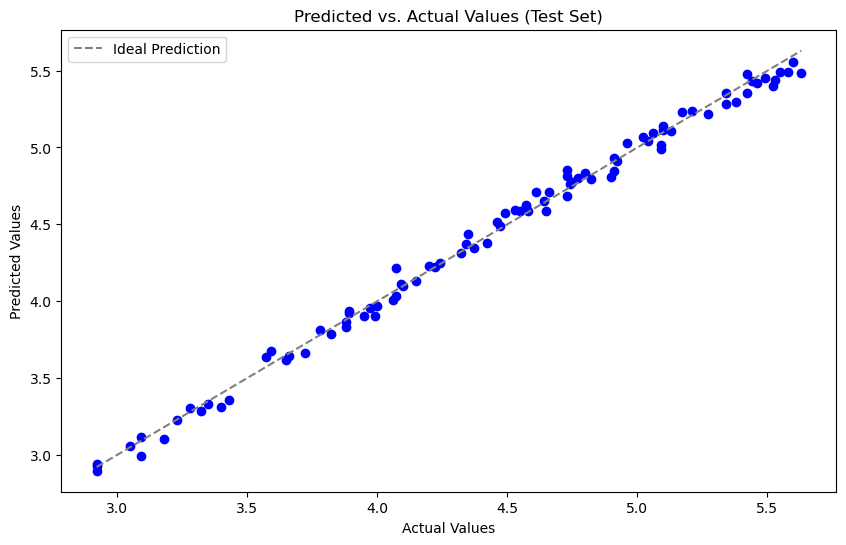

In [16]:
#Plotting the Actual values vs Predicted Value of the network

plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat, marker='o', color='blue')
plt.title('Predicted vs. Actual Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', label='Ideal Prediction')
plt.legend()
plt.show()

In [17]:
#Computing various error metrics for comparative analysis

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, yhat))
mae = mean_absolute_error(y_test, yhat)
rae = np.sum(np.abs(y_test - yhat.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.05649134938478387
RAE: 0.07431142883716979
MAE: 0.046480815410614044
R2: 0.9942461940165983


### Neural Network Training
### Model 2: Four input features: Temp min and max, Sun hours and Solar rad

In [18]:
x_reduced = data[['Temp min', 'Temp max', 'Sunlight hours','Solar Radiation']].values
y = data['ETo'].values

# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train_reduced, x_reduced, y_train, y_ = train_test_split(x_reduced, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv_reduced, x_test_reduced, y_cv, y_test = train_test_split(x_reduced, y_, test_size=0.50, random_state=1)


In [19]:
scaler = StandardScaler()
x_train_scaled_reduced = scaler.fit_transform(x_train_reduced)
x_cv_scaled__reduced = scaler.transform(x_cv_reduced)
x_test_scaled_reduced = scaler.transform(x_test_reduced)

In [20]:
lambdas = [0, 0.01, 0.03, 0.1, 0.2, 0.35]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(25, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(1, activation = 'linear')
        ]
    )
    models[i].compile(
        loss='mse',
        optimizer = 'adam',
        metrics = ['mae']
    )

    history = models[i].fit(
    x_train_scaled_reduced, y_train,
    epochs=300
)
    print(f"Finished lambda = {lambda_}")

Epoch 1/300
9/9 [==============================] - 1s 4ms/step - loss: 22.6796 - mae: 4.6527
Epoch 2/300
9/9 [==============================] - 0s 9ms/step - loss: 21.5721 - mae: 4.5295
Epoch 3/300
9/9 [==============================] - 0s 10ms/step - loss: 20.5140 - mae: 4.4086
Epoch 4/300
9/9 [==============================] - 0s 5ms/step - loss: 19.5327 - mae: 4.2916
Epoch 5/300
9/9 [==============================] - 0s 6ms/step - loss: 18.5802 - mae: 4.1749
Epoch 6/300
9/9 [==============================] - 0s 7ms/step - loss: 17.6756 - mae: 4.0618
Epoch 7/300
9/9 [==============================] - 0s 5ms/step - loss: 16.8066 - mae: 3.9498
Epoch 8/300
9/9 [==============================] - 0s 5ms/step - loss: 15.9713 - mae: 3.8376
Epoch 9/300
9/9 [==============================] - 0s 5ms/step - loss: 15.1578 - mae: 3.7271
Epoch 10/300
9/9 [==============================] - 0s 4ms/step - loss: 14.3658 - mae: 3.6158
Epoch 11/300
9/9 [==============================] - 0s 4ms/step - lo

9/9 [==============================] - 0s 3ms/step - loss: 0.3096 - mae: 0.4467
Epoch 90/300
9/9 [==============================] - 0s 3ms/step - loss: 0.3019 - mae: 0.4416
Epoch 91/300
9/9 [==============================] - 0s 2ms/step - loss: 0.2943 - mae: 0.4363
Epoch 92/300
9/9 [==============================] - 0s 3ms/step - loss: 0.2863 - mae: 0.4303
Epoch 93/300
9/9 [==============================] - 0s 3ms/step - loss: 0.2790 - mae: 0.4243
Epoch 94/300
9/9 [==============================] - 0s 3ms/step - loss: 0.2711 - mae: 0.4184
Epoch 95/300
9/9 [==============================] - 0s 3ms/step - loss: 0.2642 - mae: 0.4128
Epoch 96/300
9/9 [==============================] - 0s 3ms/step - loss: 0.2572 - mae: 0.4074
Epoch 97/300
9/9 [==============================] - 0s 3ms/step - loss: 0.2505 - mae: 0.4018
Epoch 98/300
9/9 [==============================] - 0s 3ms/step - loss: 0.2442 - mae: 0.3966
Epoch 99/300
9/9 [==============================] - 0s 3ms/step - loss: 0.2375 - ma

9/9 [==============================] - 0s 3ms/step - loss: 0.0388 - mae: 0.1579
Epoch 177/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0382 - mae: 0.1569
Epoch 178/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0376 - mae: 0.1557
Epoch 179/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0370 - mae: 0.1546
Epoch 180/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0365 - mae: 0.1538
Epoch 181/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0360 - mae: 0.1528
Epoch 182/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0355 - mae: 0.1518
Epoch 183/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0350 - mae: 0.1509
Epoch 184/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0345 - mae: 0.1502
Epoch 185/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0341 - mae: 0.1491
Epoch 186/300
9/9 [==============================] - 0s 3ms/step - loss: 0

9/9 [==============================] - 0s 3ms/step - loss: 0.0217 - mae: 0.1164
Epoch 264/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0216 - mae: 0.1164
Epoch 265/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0216 - mae: 0.1163
Epoch 266/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0214 - mae: 0.1158
Epoch 267/300
9/9 [==============================] - 0s 2ms/step - loss: 0.0214 - mae: 0.1156
Epoch 268/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0213 - mae: 0.1156
Epoch 269/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0213 - mae: 0.1155
Epoch 270/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0213 - mae: 0.1153
Epoch 271/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0212 - mae: 0.1154
Epoch 272/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0211 - mae: 0.1150
Epoch 273/300
9/9 [==============================] - 0s 3ms/step - loss: 0

9/9 [==============================] - 0s 3ms/step - loss: 0.8431 - mae: 0.6860
Epoch 51/300
9/9 [==============================] - 0s 3ms/step - loss: 0.8218 - mae: 0.6769
Epoch 52/300
9/9 [==============================] - 0s 3ms/step - loss: 0.8013 - mae: 0.6684
Epoch 53/300
9/9 [==============================] - 0s 3ms/step - loss: 0.7809 - mae: 0.6602
Epoch 54/300
9/9 [==============================] - 0s 3ms/step - loss: 0.7602 - mae: 0.6517
Epoch 55/300
9/9 [==============================] - 0s 2ms/step - loss: 0.7387 - mae: 0.6416
Epoch 56/300
9/9 [==============================] - 0s 3ms/step - loss: 0.7193 - mae: 0.6320
Epoch 57/300
9/9 [==============================] - 0s 3ms/step - loss: 0.6995 - mae: 0.6225
Epoch 58/300
9/9 [==============================] - 0s 3ms/step - loss: 0.6810 - mae: 0.6134
Epoch 59/300
9/9 [==============================] - 0s 3ms/step - loss: 0.6614 - mae: 0.6039
Epoch 60/300
9/9 [==============================] - 0s 3ms/step - loss: 0.6419 - ma

9/9 [==============================] - 0s 3ms/step - loss: 0.0975 - mae: 0.1664
Epoch 138/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0962 - mae: 0.1643
Epoch 139/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0954 - mae: 0.1626
Epoch 140/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0942 - mae: 0.1610
Epoch 141/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0933 - mae: 0.1602
Epoch 142/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0923 - mae: 0.1591
Epoch 143/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0916 - mae: 0.1578
Epoch 144/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0905 - mae: 0.1559
Epoch 145/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0896 - mae: 0.1545
Epoch 146/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0889 - mae: 0.1534
Epoch 147/300
9/9 [==============================] - 0s 5ms/step - loss: 0

9/9 [==============================] - 0s 2ms/step - loss: 0.0564 - mae: 0.1167
Epoch 225/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0562 - mae: 0.1165
Epoch 226/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0560 - mae: 0.1160
Epoch 227/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0558 - mae: 0.1160
Epoch 228/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0555 - mae: 0.1158
Epoch 229/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0552 - mae: 0.1153
Epoch 230/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0551 - mae: 0.1152
Epoch 231/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0548 - mae: 0.1151
Epoch 232/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0547 - mae: 0.1151
Epoch 233/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0543 - mae: 0.1143
Epoch 234/300
9/9 [==============================] - 0s 3ms/step - loss: 0

9/9 [==============================] - 0s 3ms/step - loss: 14.9287 - mae: 3.8167
Epoch 12/300
9/9 [==============================] - 0s 3ms/step - loss: 14.0901 - mae: 3.7067
Epoch 13/300
9/9 [==============================] - 0s 3ms/step - loss: 13.2498 - mae: 3.5926
Epoch 14/300
9/9 [==============================] - 0s 3ms/step - loss: 12.4446 - mae: 3.4794
Epoch 15/300
9/9 [==============================] - 0s 2ms/step - loss: 11.6912 - mae: 3.3688
Epoch 16/300
9/9 [==============================] - 0s 2ms/step - loss: 10.9454 - mae: 3.2542
Epoch 17/300
9/9 [==============================] - 0s 3ms/step - loss: 10.2175 - mae: 3.1363
Epoch 18/300
9/9 [==============================] - 0s 3ms/step - loss: 9.5495 - mae: 3.0236
Epoch 19/300
9/9 [==============================] - 0s 2ms/step - loss: 8.8998 - mae: 2.9074
Epoch 20/300
9/9 [==============================] - 0s 3ms/step - loss: 8.2963 - mae: 2.7943
Epoch 21/300
9/9 [==============================] - 0s 3ms/step - loss: 7.72

9/9 [==============================] - 0s 3ms/step - loss: 0.5675 - mae: 0.4586
Epoch 100/300
9/9 [==============================] - 0s 3ms/step - loss: 0.5527 - mae: 0.4496
Epoch 101/300
9/9 [==============================] - 0s 3ms/step - loss: 0.5374 - mae: 0.4405
Epoch 102/300
9/9 [==============================] - 0s 4ms/step - loss: 0.5247 - mae: 0.4325
Epoch 103/300
9/9 [==============================] - 0s 3ms/step - loss: 0.5108 - mae: 0.4240
Epoch 104/300
9/9 [==============================] - 0s 4ms/step - loss: 0.4980 - mae: 0.4156
Epoch 105/300
9/9 [==============================] - 0s 3ms/step - loss: 0.4849 - mae: 0.4074
Epoch 106/300
9/9 [==============================] - 0s 3ms/step - loss: 0.4735 - mae: 0.3995
Epoch 107/300
9/9 [==============================] - 0s 3ms/step - loss: 0.4612 - mae: 0.3913
Epoch 108/300
9/9 [==============================] - 0s 2ms/step - loss: 0.4500 - mae: 0.3833
Epoch 109/300
9/9 [==============================] - 0s 3ms/step - loss: 0

9/9 [==============================] - 0s 3ms/step - loss: 0.1489 - mae: 0.1358
Epoch 187/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1478 - mae: 0.1352
Epoch 188/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1467 - mae: 0.1346
Epoch 189/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1457 - mae: 0.1342
Epoch 190/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1447 - mae: 0.1335
Epoch 191/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1437 - mae: 0.1331
Epoch 192/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1428 - mae: 0.1327
Epoch 193/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1419 - mae: 0.1325
Epoch 194/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1408 - mae: 0.1318
Epoch 195/300
9/9 [==============================] - 0s 2ms/step - loss: 0.1399 - mae: 0.1316
Epoch 196/300
9/9 [==============================] - 0s 3ms/step - loss: 0

9/9 [==============================] - 0s 3ms/step - loss: 0.0856 - mae: 0.1155
Epoch 274/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0851 - mae: 0.1153
Epoch 275/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0846 - mae: 0.1151
Epoch 276/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0841 - mae: 0.1150
Epoch 277/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0837 - mae: 0.1149
Epoch 278/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0833 - mae: 0.1153
Epoch 279/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0827 - mae: 0.1156
Epoch 280/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0822 - mae: 0.1151
Epoch 281/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0818 - mae: 0.1150
Epoch 282/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0813 - mae: 0.1148
Epoch 283/300
9/9 [==============================] - 0s 3ms/step - loss: 0

9/9 [==============================] - 0s 3ms/step - loss: 1.3314 - mae: 0.6423
Epoch 61/300
9/9 [==============================] - 0s 3ms/step - loss: 1.2958 - mae: 0.6301
Epoch 62/300
9/9 [==============================] - 0s 3ms/step - loss: 1.2589 - mae: 0.6172
Epoch 63/300
9/9 [==============================] - 0s 2ms/step - loss: 1.2242 - mae: 0.6048
Epoch 64/300
9/9 [==============================] - 0s 3ms/step - loss: 1.1901 - mae: 0.5924
Epoch 65/300
9/9 [==============================] - 0s 3ms/step - loss: 1.1572 - mae: 0.5803
Epoch 66/300
9/9 [==============================] - 0s 3ms/step - loss: 1.1251 - mae: 0.5686
Epoch 67/300
9/9 [==============================] - 0s 3ms/step - loss: 1.0941 - mae: 0.5573
Epoch 68/300
9/9 [==============================] - 0s 3ms/step - loss: 1.0623 - mae: 0.5451
Epoch 69/300
9/9 [==============================] - 0s 3ms/step - loss: 1.0328 - mae: 0.5340
Epoch 70/300
9/9 [==============================] - 0s 4ms/step - loss: 1.0044 - ma

9/9 [==============================] - 0s 4ms/step - loss: 0.1738 - mae: 0.1305
Epoch 148/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1710 - mae: 0.1298
Epoch 149/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1683 - mae: 0.1292
Epoch 150/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1656 - mae: 0.1285
Epoch 151/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1631 - mae: 0.1277
Epoch 152/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1606 - mae: 0.1277
Epoch 153/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1579 - mae: 0.1267
Epoch 154/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1555 - mae: 0.1261
Epoch 155/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1532 - mae: 0.1259
Epoch 156/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1508 - mae: 0.1254
Epoch 157/300
9/9 [==============================] - 0s 3ms/step - loss: 0

9/9 [==============================] - 0s 3ms/step - loss: 0.0571 - mae: 0.1134
Epoch 235/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0567 - mae: 0.1138
Epoch 236/300
9/9 [==============================] - 0s 2ms/step - loss: 0.0564 - mae: 0.1143
Epoch 237/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0559 - mae: 0.1140
Epoch 238/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0553 - mae: 0.1137
Epoch 239/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0550 - mae: 0.1137
Epoch 240/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0544 - mae: 0.1131
Epoch 241/300
9/9 [==============================] - 0s 2ms/step - loss: 0.0540 - mae: 0.1135
Epoch 242/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0536 - mae: 0.1137
Epoch 243/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0532 - mae: 0.1141
Epoch 244/300
9/9 [==============================] - 0s 3ms/step - loss: 0

9/9 [==============================] - 0s 3ms/step - loss: 6.5915 - mae: 2.0592
Epoch 22/300
9/9 [==============================] - 0s 3ms/step - loss: 6.1105 - mae: 1.9414
Epoch 23/300
9/9 [==============================] - 0s 3ms/step - loss: 5.6699 - mae: 1.8267
Epoch 24/300
9/9 [==============================] - 0s 3ms/step - loss: 5.2622 - mae: 1.7151
Epoch 25/300
9/9 [==============================] - 0s 3ms/step - loss: 4.9081 - mae: 1.6087
Epoch 26/300
9/9 [==============================] - 0s 3ms/step - loss: 4.5877 - mae: 1.5083
Epoch 27/300
9/9 [==============================] - 0s 3ms/step - loss: 4.3081 - mae: 1.4165
Epoch 28/300
9/9 [==============================] - 0s 3ms/step - loss: 4.0627 - mae: 1.3323
Epoch 29/300
9/9 [==============================] - 0s 3ms/step - loss: 3.8512 - mae: 1.2549
Epoch 30/300
9/9 [==============================] - 0s 3ms/step - loss: 3.6644 - mae: 1.1870
Epoch 31/300
9/9 [==============================] - 0s 3ms/step - loss: 3.5001 - ma

9/9 [==============================] - 0s 3ms/step - loss: 0.2050 - mae: 0.1253
Epoch 110/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1995 - mae: 0.1246
Epoch 111/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1940 - mae: 0.1238
Epoch 112/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1888 - mae: 0.1227
Epoch 113/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1837 - mae: 0.1217
Epoch 114/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1790 - mae: 0.1211
Epoch 115/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1742 - mae: 0.1202
Epoch 116/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1696 - mae: 0.1197
Epoch 117/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1652 - mae: 0.1193
Epoch 118/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1610 - mae: 0.1186
Epoch 119/300
9/9 [==============================] - 0s 3ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 0.0497 - mae: 0.1239
Epoch 197/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0496 - mae: 0.1238
Epoch 198/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0492 - mae: 0.1236
Epoch 199/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0492 - mae: 0.1239
Epoch 200/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0492 - mae: 0.1246
Epoch 201/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0487 - mae: 0.1252
Epoch 202/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0483 - mae: 0.1243
Epoch 203/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0482 - mae: 0.1236
Epoch 204/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0481 - mae: 0.1235
Epoch 205/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0479 - mae: 0.1237
Epoch 206/300
9/9 [==============================] - 0s 2ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 0.0427 - mae: 0.1234
Epoch 284/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0427 - mae: 0.1237
Epoch 285/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0427 - mae: 0.1248
Epoch 286/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0427 - mae: 0.1244
Epoch 287/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0427 - mae: 0.1241
Epoch 288/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0425 - mae: 0.1237
Epoch 289/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0425 - mae: 0.1241
Epoch 290/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0426 - mae: 0.1241
Epoch 291/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0428 - mae: 0.1247
Epoch 292/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0424 - mae: 0.1240
Epoch 293/300
9/9 [==============================] - 0s 4ms/step - loss: 0

9/9 [==============================] - 0s 3ms/step - loss: 0.5534 - mae: 0.2157
Epoch 71/300
9/9 [==============================] - 0s 3ms/step - loss: 0.5286 - mae: 0.2092
Epoch 72/300
9/9 [==============================] - 0s 3ms/step - loss: 0.5056 - mae: 0.2036
Epoch 73/300
9/9 [==============================] - 0s 3ms/step - loss: 0.4835 - mae: 0.1976
Epoch 74/300
9/9 [==============================] - 0s 3ms/step - loss: 0.4629 - mae: 0.1928
Epoch 75/300
9/9 [==============================] - 0s 3ms/step - loss: 0.4428 - mae: 0.1871
Epoch 76/300
9/9 [==============================] - 0s 3ms/step - loss: 0.4243 - mae: 0.1824
Epoch 77/300
9/9 [==============================] - 0s 3ms/step - loss: 0.4063 - mae: 0.1774
Epoch 78/300
9/9 [==============================] - 0s 3ms/step - loss: 0.3893 - mae: 0.1729
Epoch 79/300
9/9 [==============================] - 0s 3ms/step - loss: 0.3732 - mae: 0.1684
Epoch 80/300
9/9 [==============================] - 0s 3ms/step - loss: 0.3580 - ma

9/9 [==============================] - 0s 3ms/step - loss: 0.0535 - mae: 0.1269
Epoch 158/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0531 - mae: 0.1274
Epoch 159/300
9/9 [==============================] - 0s 2ms/step - loss: 0.0527 - mae: 0.1275
Epoch 160/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0524 - mae: 0.1273
Epoch 161/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0520 - mae: 0.1274
Epoch 162/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0517 - mae: 0.1275
Epoch 163/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0516 - mae: 0.1279
Epoch 164/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0512 - mae: 0.1276
Epoch 165/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0509 - mae: 0.1278
Epoch 166/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0507 - mae: 0.1279
Epoch 167/300
9/9 [==============================] - 0s 3ms/step - loss: 0

9/9 [==============================] - 0s 3ms/step - loss: 0.0458 - mae: 0.1272
Epoch 245/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0460 - mae: 0.1280
Epoch 246/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0460 - mae: 0.1289
Epoch 247/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0459 - mae: 0.1286
Epoch 248/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0459 - mae: 0.1285
Epoch 249/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0459 - mae: 0.1287
Epoch 250/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0458 - mae: 0.1286
Epoch 251/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0458 - mae: 0.1272
Epoch 252/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0457 - mae: 0.1267
Epoch 253/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0457 - mae: 0.1270
Epoch 254/300
9/9 [==============================] - 0s 3ms/step - loss: 0

In [21]:
nn_train_mses = []
nn_cv_mses = []

for i in range(len(models)):
    yhat = models[i].predict(x_train_scaled_reduced)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)

    # Record the cross validation MSEs 
    yhat = models[i].predict(x_cv_scaled__reduced)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

    
# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
        )

3/3 [==============================] - 0s 4ms/step
RESULTS:
Model 1: Training MSE: 0.01, CV MSE: 0.02
Model 2: Training MSE: 0.01, CV MSE: 0.01
Model 3: Training MSE: 0.01, CV MSE: 0.01
Model 4: Training MSE: 0.01, CV MSE: 0.01
Model 5: Training MSE: 0.01, CV MSE: 0.02
Model 6: Training MSE: 0.01, CV MSE: 0.02


In [22]:
# Select the model with the lowest CV MSE
model_num = 4

# Compute the test MSE
yhat = models[model_num-1].predict(x_test_scaled_reduced)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

3/3 [==============================] - 0s 4ms/step
Selected Model: 4
Training MSE: 0.01
Cross Validation MSE: 0.01
Test MSE: 0.01


In [23]:
comparison_df = pd.DataFrame({'Actual Values': y_test.flatten(), 'Predicted Values': yhat.flatten()})
pd.set_option('display.max_rows', None)

# Print the DataFrame to compare the results of the prediction to the actual value
differences = np.absolute(y_test - yhat.flatten()).flatten()
df_differences = pd.DataFrame({'differences':differences})
comparison_df.head(7)

Actual Values  Predicted Values
0           4.09          4.154941
1           4.55          4.792546
2           3.59          3.662995
3           4.20          4.295866
4           4.22          4.191715
5           5.13          4.976377
6           5.06          4.967093

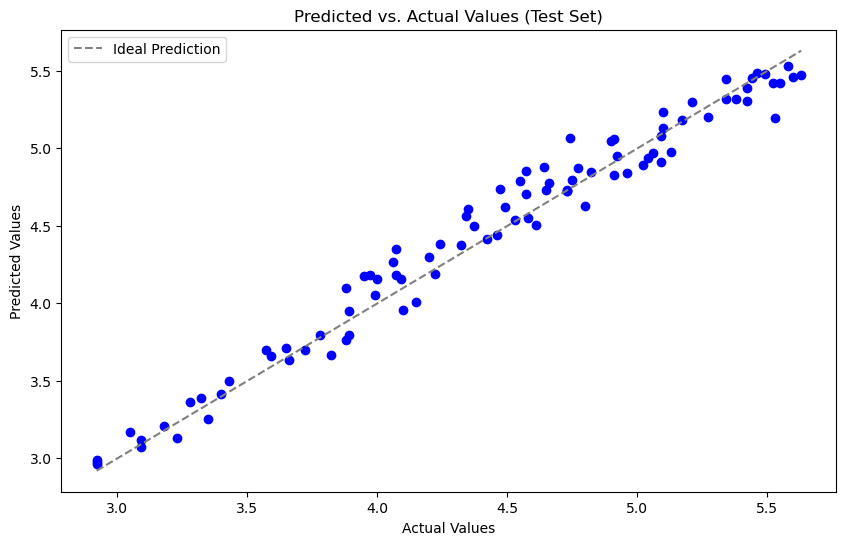

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat, marker='o', color='blue')
plt.title('Predicted vs. Actual Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', label='Ideal Prediction')
plt.legend()
plt.show()

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, yhat))
mae = mean_absolute_error(y_test, yhat)
rae = np.sum(np.abs(y_test - yhat.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.12960211901561236
RAE: 0.16460973177981306
MAE: 0.1029612090276635
R2: 0.9697158407725512


### Neural Network Training
### Model 3: Three input features: Temp max, Sun hours and Solar rad

In [26]:
x_reduced2 = data[['Temp max', 'Sunlight hours','Solar Radiation']].values
y = data['ETo'].values

# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train_reduced2, x_reduced2, y_train, y_ = train_test_split(x_reduced2, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv_reduced2, x_test_reduced2, y_cv, y_test = train_test_split(x_reduced2, y_, test_size=0.50, random_state=1)


In [27]:
scaler = StandardScaler()
x_train_scaled_reduced2 = scaler.fit_transform(x_train_reduced2)
x_cv_scaled__reduced2 = scaler.transform(x_cv_reduced2)
x_test_scaled_reduced2 = scaler.transform(x_test_reduced2)

In [28]:
lambdas = [0, 0.01, 0.03, 0.1, 0.2, 0.35]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(25, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(1, activation = 'linear')
        ]
    )
    models[i].compile(
        loss='mse',
        optimizer = 'adam',
        metrics = ['mae']
    )

    history = models[i].fit(
    x_train_scaled_reduced2, y_train,
    epochs=300
)
    print(f"Finished lambda = {lambda_}")

Epoch 1/300
9/9 [==============================] - 1s 3ms/step - loss: 23.7212 - mae: 4.7509
Epoch 2/300
9/9 [==============================] - 0s 3ms/step - loss: 22.5389 - mae: 4.6299
Epoch 3/300
9/9 [==============================] - 0s 6ms/step - loss: 21.3927 - mae: 4.5100
Epoch 4/300
9/9 [==============================] - 0s 4ms/step - loss: 20.2993 - mae: 4.3928
Epoch 5/300
9/9 [==============================] - 0s 4ms/step - loss: 19.2713 - mae: 4.2788
Epoch 6/300
9/9 [==============================] - 0s 4ms/step - loss: 18.2646 - mae: 4.1656
Epoch 7/300
9/9 [==============================] - 0s 3ms/step - loss: 17.3100 - mae: 4.0545
Epoch 8/300
9/9 [==============================] - 0s 6ms/step - loss: 16.3662 - mae: 3.9418
Epoch 9/300
9/9 [==============================] - 0s 6ms/step - loss: 15.4628 - mae: 3.8306
Epoch 10/300
9/9 [==============================] - 0s 3ms/step - loss: 14.5730 - mae: 3.7173
Epoch 11/300
9/9 [==============================] - 0s 4ms/step - los

9/9 [==============================] - 0s 3ms/step - loss: 0.3048 - mae: 0.4343
Epoch 90/300
9/9 [==============================] - 0s 3ms/step - loss: 0.2894 - mae: 0.4224
Epoch 91/300
9/9 [==============================] - 0s 3ms/step - loss: 0.2753 - mae: 0.4109
Epoch 92/300
9/9 [==============================] - 0s 3ms/step - loss: 0.2614 - mae: 0.3997
Epoch 93/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2481 - mae: 0.3887
Epoch 94/300
9/9 [==============================] - 0s 3ms/step - loss: 0.2357 - mae: 0.3786
Epoch 95/300
9/9 [==============================] - 0s 3ms/step - loss: 0.2241 - mae: 0.3686
Epoch 96/300
9/9 [==============================] - 0s 3ms/step - loss: 0.2131 - mae: 0.3593
Epoch 97/300
9/9 [==============================] - 0s 3ms/step - loss: 0.2025 - mae: 0.3501
Epoch 98/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1929 - mae: 0.3412
Epoch 99/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1828 - ma

9/9 [==============================] - 0s 3ms/step - loss: 0.0301 - mae: 0.1337
Epoch 177/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0300 - mae: 0.1333
Epoch 178/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0298 - mae: 0.1328
Epoch 179/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0296 - mae: 0.1324
Epoch 180/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0294 - mae: 0.1320
Epoch 181/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0293 - mae: 0.1318
Epoch 182/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0291 - mae: 0.1314
Epoch 183/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0290 - mae: 0.1308
Epoch 184/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0289 - mae: 0.1309
Epoch 185/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0287 - mae: 0.1304
Epoch 186/300
9/9 [==============================] - 0s 3ms/step - loss: 0

9/9 [==============================] - 0s 3ms/step - loss: 0.0235 - mae: 0.1155
Epoch 264/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0234 - mae: 0.1157
Epoch 265/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0235 - mae: 0.1160
Epoch 266/300
9/9 [==============================] - 0s 2ms/step - loss: 0.0234 - mae: 0.1155
Epoch 267/300
9/9 [==============================] - 0s 2ms/step - loss: 0.0233 - mae: 0.1153
Epoch 268/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0233 - mae: 0.1152
Epoch 269/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0233 - mae: 0.1150
Epoch 270/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0232 - mae: 0.1149
Epoch 271/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0232 - mae: 0.1146
Epoch 272/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0232 - mae: 0.1146
Epoch 273/300
9/9 [==============================] - 0s 4ms/step - loss: 0

9/9 [==============================] - 0s 2ms/step - loss: 1.3697 - mae: 0.8854
Epoch 51/300
9/9 [==============================] - 0s 3ms/step - loss: 1.3386 - mae: 0.8747
Epoch 52/300
9/9 [==============================] - 0s 3ms/step - loss: 1.3099 - mae: 0.8643
Epoch 53/300
9/9 [==============================] - 0s 3ms/step - loss: 1.2802 - mae: 0.8539
Epoch 54/300
9/9 [==============================] - 0s 3ms/step - loss: 1.2502 - mae: 0.8431
Epoch 55/300
9/9 [==============================] - 0s 10ms/step - loss: 1.2214 - mae: 0.8330
Epoch 56/300
9/9 [==============================] - 0s 5ms/step - loss: 1.1912 - mae: 0.8216
Epoch 57/300
9/9 [==============================] - 0s 3ms/step - loss: 1.1624 - mae: 0.8108
Epoch 58/300
9/9 [==============================] - 0s 3ms/step - loss: 1.1320 - mae: 0.7989
Epoch 59/300
9/9 [==============================] - 0s 3ms/step - loss: 1.1034 - mae: 0.7879
Epoch 60/300
9/9 [==============================] - 0s 3ms/step - loss: 1.0739 - m

9/9 [==============================] - 0s 3ms/step - loss: 0.1206 - mae: 0.2044
Epoch 138/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1186 - mae: 0.2014
Epoch 139/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1165 - mae: 0.1983
Epoch 140/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1147 - mae: 0.1954
Epoch 141/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1128 - mae: 0.1925
Epoch 142/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1112 - mae: 0.1901
Epoch 143/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1094 - mae: 0.1871
Epoch 144/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1078 - mae: 0.1846
Epoch 145/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1063 - mae: 0.1822
Epoch 146/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1047 - mae: 0.1796
Epoch 147/300
9/9 [==============================] - 0s 3ms/step - loss: 0

9/9 [==============================] - 0s 3ms/step - loss: 0.0658 - mae: 0.1257
Epoch 225/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0657 - mae: 0.1256
Epoch 226/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0654 - mae: 0.1256
Epoch 227/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0652 - mae: 0.1255
Epoch 228/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0650 - mae: 0.1253
Epoch 229/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0648 - mae: 0.1251
Epoch 230/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0646 - mae: 0.1248
Epoch 231/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0644 - mae: 0.1245
Epoch 232/300
9/9 [==============================] - 0s 2ms/step - loss: 0.0642 - mae: 0.1240
Epoch 233/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0639 - mae: 0.1239
Epoch 234/300
9/9 [==============================] - 0s 3ms/step - loss: 0

9/9 [==============================] - 0s 3ms/step - loss: 8.6783 - mae: 2.7336
Epoch 12/300
9/9 [==============================] - 0s 3ms/step - loss: 7.8431 - mae: 2.5854
Epoch 13/300
9/9 [==============================] - 0s 4ms/step - loss: 7.0780 - mae: 2.4374
Epoch 14/300
9/9 [==============================] - 0s 5ms/step - loss: 6.3472 - mae: 2.2901
Epoch 15/300
9/9 [==============================] - 0s 4ms/step - loss: 5.6616 - mae: 2.1429
Epoch 16/300
9/9 [==============================] - 0s 3ms/step - loss: 5.0431 - mae: 1.9992
Epoch 17/300
9/9 [==============================] - 0s 2ms/step - loss: 4.4805 - mae: 1.8617
Epoch 18/300
9/9 [==============================] - 0s 3ms/step - loss: 3.9796 - mae: 1.7290
Epoch 19/300
9/9 [==============================] - 0s 3ms/step - loss: 3.5473 - mae: 1.6063
Epoch 20/300
9/9 [==============================] - 0s 3ms/step - loss: 3.1778 - mae: 1.4896
Epoch 21/300
9/9 [==============================] - 0s 3ms/step - loss: 2.8629 - ma

9/9 [==============================] - 0s 3ms/step - loss: 0.1987 - mae: 0.2045
Epoch 100/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1943 - mae: 0.1992
Epoch 101/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1907 - mae: 0.1947
Epoch 102/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1872 - mae: 0.1905
Epoch 103/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1837 - mae: 0.1863
Epoch 104/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1806 - mae: 0.1824
Epoch 105/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1776 - mae: 0.1788
Epoch 106/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1748 - mae: 0.1760
Epoch 107/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1722 - mae: 0.1731
Epoch 108/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1696 - mae: 0.1704
Epoch 109/300
9/9 [==============================] - 0s 3ms/step - loss: 0

9/9 [==============================] - 0s 3ms/step - loss: 0.0912 - mae: 0.1144
Epoch 187/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0907 - mae: 0.1141
Epoch 188/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0900 - mae: 0.1141
Epoch 189/300
9/9 [==============================] - 0s 2ms/step - loss: 0.0895 - mae: 0.1138
Epoch 190/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0889 - mae: 0.1135
Epoch 191/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0884 - mae: 0.1138
Epoch 192/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0878 - mae: 0.1138
Epoch 193/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0872 - mae: 0.1133
Epoch 194/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0866 - mae: 0.1130
Epoch 195/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0861 - mae: 0.1128
Epoch 196/300
9/9 [==============================] - 0s 3ms/step - loss: 0

9/9 [==============================] - 0s 3ms/step - loss: 0.0540 - mae: 0.1089
Epoch 274/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0536 - mae: 0.1087
Epoch 275/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0534 - mae: 0.1090
Epoch 276/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0531 - mae: 0.1091
Epoch 277/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0528 - mae: 0.1087
Epoch 278/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0525 - mae: 0.1088
Epoch 279/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0522 - mae: 0.1088
Epoch 280/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0519 - mae: 0.1090
Epoch 281/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0516 - mae: 0.1089
Epoch 282/300
9/9 [==============================] - 0s 2ms/step - loss: 0.0514 - mae: 0.1091
Epoch 283/300
9/9 [==============================] - 0s 3ms/step - loss: 0

9/9 [==============================] - 0s 3ms/step - loss: 1.1321 - mae: 0.6252
Epoch 61/300
9/9 [==============================] - 0s 3ms/step - loss: 1.0928 - mae: 0.6096
Epoch 62/300
9/9 [==============================] - 0s 3ms/step - loss: 1.0553 - mae: 0.5943
Epoch 63/300
9/9 [==============================] - 0s 3ms/step - loss: 1.0183 - mae: 0.5789
Epoch 64/300
9/9 [==============================] - 0s 3ms/step - loss: 0.9822 - mae: 0.5628
Epoch 65/300
9/9 [==============================] - 0s 3ms/step - loss: 0.9472 - mae: 0.5470
Epoch 66/300
9/9 [==============================] - 0s 3ms/step - loss: 0.9136 - mae: 0.5313
Epoch 67/300
9/9 [==============================] - 0s 2ms/step - loss: 0.8804 - mae: 0.5156
Epoch 68/300
9/9 [==============================] - 0s 3ms/step - loss: 0.8502 - mae: 0.5013
Epoch 69/300
9/9 [==============================] - 0s 3ms/step - loss: 0.8189 - mae: 0.4860
Epoch 70/300
9/9 [==============================] - 0s 3ms/step - loss: 0.7889 - ma

9/9 [==============================] - 0s 3ms/step - loss: 0.1478 - mae: 0.1206
Epoch 148/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1458 - mae: 0.1201
Epoch 149/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1438 - mae: 0.1197
Epoch 150/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1419 - mae: 0.1196
Epoch 151/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1400 - mae: 0.1192
Epoch 152/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1381 - mae: 0.1190
Epoch 153/300
9/9 [==============================] - 0s 2ms/step - loss: 0.1363 - mae: 0.1187
Epoch 154/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1345 - mae: 0.1186
Epoch 155/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1327 - mae: 0.1183
Epoch 156/300
9/9 [==============================] - 0s 2ms/step - loss: 0.1309 - mae: 0.1181
Epoch 157/300
9/9 [==============================] - 0s 3ms/step - loss: 0

9/9 [==============================] - 0s 3ms/step - loss: 0.0569 - mae: 0.1157
Epoch 235/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0565 - mae: 0.1157
Epoch 236/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0561 - mae: 0.1159
Epoch 237/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0558 - mae: 0.1163
Epoch 238/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0553 - mae: 0.1160
Epoch 239/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0549 - mae: 0.1161
Epoch 240/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0545 - mae: 0.1160
Epoch 241/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0541 - mae: 0.1161
Epoch 242/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0540 - mae: 0.1170
Epoch 243/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0534 - mae: 0.1164
Epoch 244/300
9/9 [==============================] - 0s 3ms/step - loss: 0

9/9 [==============================] - 0s 3ms/step - loss: 8.4092 - mae: 2.4533
Epoch 22/300
9/9 [==============================] - 0s 3ms/step - loss: 7.8503 - mae: 2.3603
Epoch 23/300
9/9 [==============================] - 0s 3ms/step - loss: 7.3120 - mae: 2.2667
Epoch 24/300
9/9 [==============================] - 0s 3ms/step - loss: 6.7861 - mae: 2.1704
Epoch 25/300
9/9 [==============================] - 0s 2ms/step - loss: 6.2737 - mae: 2.0712
Epoch 26/300
9/9 [==============================] - 0s 2ms/step - loss: 5.7860 - mae: 1.9701
Epoch 27/300
9/9 [==============================] - 0s 3ms/step - loss: 5.3106 - mae: 1.8654
Epoch 28/300
9/9 [==============================] - 0s 3ms/step - loss: 4.8789 - mae: 1.7621
Epoch 29/300
9/9 [==============================] - 0s 3ms/step - loss: 4.4809 - mae: 1.6606
Epoch 30/300
9/9 [==============================] - 0s 3ms/step - loss: 4.1097 - mae: 1.5557
Epoch 31/300
9/9 [==============================] - 0s 3ms/step - loss: 3.7935 - ma

9/9 [==============================] - 0s 3ms/step - loss: 0.2811 - mae: 0.1666
Epoch 110/300
9/9 [==============================] - 0s 3ms/step - loss: 0.2743 - mae: 0.1638
Epoch 111/300
9/9 [==============================] - 0s 3ms/step - loss: 0.2676 - mae: 0.1609
Epoch 112/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2612 - mae: 0.1585
Epoch 113/300
9/9 [==============================] - 0s 3ms/step - loss: 0.2550 - mae: 0.1560
Epoch 114/300
9/9 [==============================] - 0s 3ms/step - loss: 0.2489 - mae: 0.1536
Epoch 115/300
9/9 [==============================] - 0s 3ms/step - loss: 0.2430 - mae: 0.1512
Epoch 116/300
9/9 [==============================] - 0s 3ms/step - loss: 0.2374 - mae: 0.1492
Epoch 117/300
9/9 [==============================] - 0s 3ms/step - loss: 0.2318 - mae: 0.1470
Epoch 118/300
9/9 [==============================] - 0s 3ms/step - loss: 0.2264 - mae: 0.1455
Epoch 119/300
9/9 [==============================] - 0s 3ms/step - loss: 0

9/9 [==============================] - 0s 3ms/step - loss: 0.0602 - mae: 0.1217
Epoch 197/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0596 - mae: 0.1219
Epoch 198/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0591 - mae: 0.1220
Epoch 199/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0586 - mae: 0.1224
Epoch 200/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0581 - mae: 0.1226
Epoch 201/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0576 - mae: 0.1223
Epoch 202/300
9/9 [==============================] - 0s 2ms/step - loss: 0.0572 - mae: 0.1223
Epoch 203/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0568 - mae: 0.1225
Epoch 204/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0564 - mae: 0.1230
Epoch 205/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0560 - mae: 0.1231
Epoch 206/300
9/9 [==============================] - 0s 3ms/step - loss: 0

9/9 [==============================] - 0s 3ms/step - loss: 0.0424 - mae: 0.1266
Epoch 284/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0429 - mae: 0.1280
Epoch 285/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0426 - mae: 0.1270
Epoch 286/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0428 - mae: 0.1271
Epoch 287/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0424 - mae: 0.1267
Epoch 288/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0424 - mae: 0.1274
Epoch 289/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0423 - mae: 0.1270
Epoch 290/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0423 - mae: 0.1267
Epoch 291/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0422 - mae: 0.1266
Epoch 292/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0423 - mae: 0.1266
Epoch 293/300
9/9 [==============================] - 0s 4ms/step - loss: 0

9/9 [==============================] - 0s 3ms/step - loss: 0.5815 - mae: 0.2838
Epoch 71/300
9/9 [==============================] - 0s 2ms/step - loss: 0.5585 - mae: 0.2764
Epoch 72/300
9/9 [==============================] - 0s 3ms/step - loss: 0.5365 - mae: 0.2689
Epoch 73/300
9/9 [==============================] - 0s 3ms/step - loss: 0.5157 - mae: 0.2618
Epoch 74/300
9/9 [==============================] - 0s 3ms/step - loss: 0.4954 - mae: 0.2548
Epoch 75/300
9/9 [==============================] - 0s 3ms/step - loss: 0.4763 - mae: 0.2481
Epoch 76/300
9/9 [==============================] - 0s 3ms/step - loss: 0.4580 - mae: 0.2418
Epoch 77/300
9/9 [==============================] - 0s 3ms/step - loss: 0.4404 - mae: 0.2356
Epoch 78/300
9/9 [==============================] - 0s 2ms/step - loss: 0.4235 - mae: 0.2290
Epoch 79/300
9/9 [==============================] - 0s 3ms/step - loss: 0.4072 - mae: 0.2228
Epoch 80/300
9/9 [==============================] - 0s 4ms/step - loss: 0.3918 - ma

9/9 [==============================] - 0s 3ms/step - loss: 0.0600 - mae: 0.1253
Epoch 158/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0595 - mae: 0.1258
Epoch 159/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0589 - mae: 0.1256
Epoch 160/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0584 - mae: 0.1257
Epoch 161/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0579 - mae: 0.1258
Epoch 162/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0574 - mae: 0.1260
Epoch 163/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0570 - mae: 0.1262
Epoch 164/300
9/9 [==============================] - 0s 2ms/step - loss: 0.0565 - mae: 0.1263
Epoch 165/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0561 - mae: 0.1263
Epoch 166/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0557 - mae: 0.1262
Epoch 167/300
9/9 [==============================] - 0s 3ms/step - loss: 0

9/9 [==============================] - 0s 3ms/step - loss: 0.0479 - mae: 0.1312
Epoch 245/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0479 - mae: 0.1315
Epoch 246/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0479 - mae: 0.1320
Epoch 247/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0479 - mae: 0.1309
Epoch 248/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0479 - mae: 0.1309
Epoch 249/300
9/9 [==============================] - 0s 2ms/step - loss: 0.0478 - mae: 0.1312
Epoch 250/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0478 - mae: 0.1319
Epoch 251/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0479 - mae: 0.1313
Epoch 252/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0479 - mae: 0.1310
Epoch 253/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0477 - mae: 0.1311
Epoch 254/300
9/9 [==============================] - 0s 3ms/step - loss: 0

In [29]:
nn_train_mses = []
nn_cv_mses = []

for i in range(len(models)):
    yhat = models[i].predict(x_train_scaled_reduced2)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)

    # Record the cross validation MSEs 
    yhat = models[i].predict(x_cv_scaled__reduced2)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

    
# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
        )

3/3 [==============================] - 0s 3ms/step
RESULTS:
Model 1: Training MSE: 0.01, CV MSE: 0.01
Model 2: Training MSE: 0.01, CV MSE: 0.01
Model 3: Training MSE: 0.01, CV MSE: 0.01
Model 4: Training MSE: 0.01, CV MSE: 0.01
Model 5: Training MSE: 0.01, CV MSE: 0.02
Model 6: Training MSE: 0.01, CV MSE: 0.02


In [30]:
# Select the model with the lowest CV MSE
model_num = 4

# Compute the test MSE
yhat = models[model_num-1].predict(x_test_scaled_reduced2)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

3/3 [==============================] - 0s 4ms/step
Selected Model: 4
Training MSE: 0.01
Cross Validation MSE: 0.01
Test MSE: 0.01


In [31]:
comparison_df = pd.DataFrame({'Actual Values': y_test.flatten(), 'Predicted Values': yhat.flatten()})
pd.set_option('display.max_rows', None)

# Print the DataFrame
differences = np.absolute(y_test - yhat.flatten()).flatten()
df_differences = pd.DataFrame({'differences':differences})
comparison_df.head(7)

Actual Values  Predicted Values
0           4.09          4.173445
1           4.55          4.807525
2           3.59          3.648217
3           4.20          4.281885
4           4.22          4.202786
5           5.13          4.960021
6           5.06          4.931486

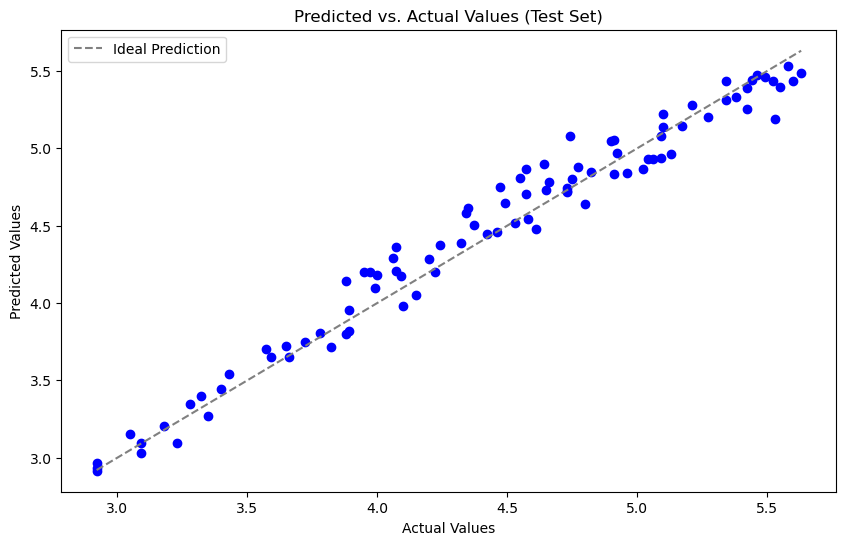

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat, marker='o', color='blue')
plt.title('Predicted vs. Actual Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', label='Ideal Prediction')
plt.legend()
plt.show()

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, yhat))
mae = mean_absolute_error(y_test, yhat)
rae = np.sum(np.abs(y_test - yhat.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.1350672505197409
RAE: 0.1697801564876143
MAE: 0.10619524126467493
R2: 0.9671079126617874


### Neural Network Training
### Model 4: Three input features: Temp min, Sun hours and Solar rad

In [34]:
x_reduced3 = data[['Sunlight hours','Solar Radiation', 'Temp min']].values
y = data['ETo'].values

# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train_reduced3, x_reduced3, y_train, y_ = train_test_split(x_reduced3, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv_reduced3, x_test_reduced3, y_cv, y_test = train_test_split(x_reduced3, y_, test_size=0.50, random_state=1)



In [35]:
scaler = StandardScaler()
x_train_scaled_reduced3 = scaler.fit_transform(x_train_reduced3)
x_cv_scaled__reduced3 = scaler.transform(x_cv_reduced3)
x_test_scaled_reduced3 = scaler.transform(x_test_reduced3)

In [36]:
lambdas = [0, 0.01, 0.03, 0.1, 0.2, 0.35]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(25, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(1, activation = 'linear')
        ]
    )
    models[i].compile(
        loss='mse',
        optimizer = 'adam',
        metrics = ['mae']
    )

    history = models[i].fit(
    x_train_scaled_reduced3, y_train,
    epochs=300
)
    print(f"Finished lambda = {lambda_}")

Epoch 1/300
9/9 [==============================] - 1s 2ms/step - loss: 21.6307 - mae: 4.5927
Epoch 2/300
9/9 [==============================] - 0s 3ms/step - loss: 20.6191 - mae: 4.4831
Epoch 3/300
9/9 [==============================] - 0s 3ms/step - loss: 19.6609 - mae: 4.3772
Epoch 4/300
9/9 [==============================] - 0s 3ms/step - loss: 18.7527 - mae: 4.2736
Epoch 5/300
9/9 [==============================] - 0s 3ms/step - loss: 17.8749 - mae: 4.1714
Epoch 6/300
9/9 [==============================] - 0s 3ms/step - loss: 17.0373 - mae: 4.0713
Epoch 7/300
9/9 [==============================] - 0s 3ms/step - loss: 16.2351 - mae: 3.9725
Epoch 8/300
9/9 [==============================] - 0s 4ms/step - loss: 15.4425 - mae: 3.8728
Epoch 9/300
9/9 [==============================] - 0s 3ms/step - loss: 14.6806 - mae: 3.7741
Epoch 10/300
9/9 [==============================] - 0s 3ms/step - loss: 13.9136 - mae: 3.6720
Epoch 11/300
9/9 [==============================] - 0s 4ms/step - los

9/9 [==============================] - 0s 3ms/step - loss: 0.2803 - mae: 0.4222
Epoch 90/300
9/9 [==============================] - 0s 3ms/step - loss: 0.2725 - mae: 0.4154
Epoch 91/300
9/9 [==============================] - 0s 3ms/step - loss: 0.2643 - mae: 0.4084
Epoch 92/300
9/9 [==============================] - 0s 2ms/step - loss: 0.2572 - mae: 0.4023
Epoch 93/300
9/9 [==============================] - 0s 3ms/step - loss: 0.2506 - mae: 0.3968
Epoch 94/300
9/9 [==============================] - 0s 3ms/step - loss: 0.2439 - mae: 0.3907
Epoch 95/300
9/9 [==============================] - 0s 3ms/step - loss: 0.2377 - mae: 0.3852
Epoch 96/300
9/9 [==============================] - 0s 2ms/step - loss: 0.2315 - mae: 0.3797
Epoch 97/300
9/9 [==============================] - 0s 2ms/step - loss: 0.2259 - mae: 0.3743
Epoch 98/300
9/9 [==============================] - 0s 3ms/step - loss: 0.2202 - mae: 0.3693
Epoch 99/300
9/9 [==============================] - 0s 3ms/step - loss: 0.2148 - ma

9/9 [==============================] - 0s 3ms/step - loss: 0.0756 - mae: 0.2141
Epoch 177/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0752 - mae: 0.2136
Epoch 178/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0747 - mae: 0.2128
Epoch 179/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0743 - mae: 0.2122
Epoch 180/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0740 - mae: 0.2117
Epoch 181/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0735 - mae: 0.2111
Epoch 182/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0732 - mae: 0.2103
Epoch 183/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0728 - mae: 0.2099
Epoch 184/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0725 - mae: 0.2096
Epoch 185/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0722 - mae: 0.2088
Epoch 186/300
9/9 [==============================] - 0s 3ms/step - loss: 0

9/9 [==============================] - 0s 3ms/step - loss: 0.0609 - mae: 0.1926
Epoch 264/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0608 - mae: 0.1922
Epoch 265/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0607 - mae: 0.1923
Epoch 266/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0608 - mae: 0.1922
Epoch 267/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0608 - mae: 0.1921
Epoch 268/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0606 - mae: 0.1918
Epoch 269/300
9/9 [==============================] - 0s 2ms/step - loss: 0.0605 - mae: 0.1919
Epoch 270/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0605 - mae: 0.1920
Epoch 271/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0604 - mae: 0.1919
Epoch 272/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0604 - mae: 0.1918
Epoch 273/300
9/9 [==============================] - 0s 2ms/step - loss: 0

9/9 [==============================] - 0s 3ms/step - loss: 0.9339 - mae: 0.7610
Epoch 51/300
9/9 [==============================] - 0s 3ms/step - loss: 0.9087 - mae: 0.7509
Epoch 52/300
9/9 [==============================] - 0s 4ms/step - loss: 0.8849 - mae: 0.7407
Epoch 53/300
9/9 [==============================] - 0s 3ms/step - loss: 0.8600 - mae: 0.7301
Epoch 54/300
9/9 [==============================] - 0s 3ms/step - loss: 0.8369 - mae: 0.7203
Epoch 55/300
9/9 [==============================] - 0s 3ms/step - loss: 0.8128 - mae: 0.7095
Epoch 56/300
9/9 [==============================] - 0s 3ms/step - loss: 0.7904 - mae: 0.6991
Epoch 57/300
9/9 [==============================] - 0s 2ms/step - loss: 0.7667 - mae: 0.6878
Epoch 58/300
9/9 [==============================] - 0s 3ms/step - loss: 0.7444 - mae: 0.6770
Epoch 59/300
9/9 [==============================] - 0s 3ms/step - loss: 0.7226 - mae: 0.6663
Epoch 60/300
9/9 [==============================] - 0s 2ms/step - loss: 0.7002 - ma

9/9 [==============================] - 0s 5ms/step - loss: 0.1158 - mae: 0.2148
Epoch 138/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1149 - mae: 0.2137
Epoch 139/300
9/9 [==============================] - 0s 2ms/step - loss: 0.1139 - mae: 0.2126
Epoch 140/300
9/9 [==============================] - 0s 9ms/step - loss: 0.1131 - mae: 0.2121
Epoch 141/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1123 - mae: 0.2113
Epoch 142/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1116 - mae: 0.2105
Epoch 143/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1108 - mae: 0.2093
Epoch 144/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1101 - mae: 0.2082
Epoch 145/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1094 - mae: 0.2072
Epoch 146/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1087 - mae: 0.2065
Epoch 147/300
9/9 [==============================] - 0s 2ms/step - loss: 0

9/9 [==============================] - 0s 3ms/step - loss: 0.0862 - mae: 0.1861
Epoch 225/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0860 - mae: 0.1859
Epoch 226/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0859 - mae: 0.1857
Epoch 227/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0857 - mae: 0.1858
Epoch 228/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0856 - mae: 0.1858
Epoch 229/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0856 - mae: 0.1860
Epoch 230/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0856 - mae: 0.1857
Epoch 231/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0853 - mae: 0.1856
Epoch 232/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0852 - mae: 0.1856
Epoch 233/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0850 - mae: 0.1857
Epoch 234/300
9/9 [==============================] - 0s 3ms/step - loss: 0

9/9 [==============================] - 0s 3ms/step - loss: 8.3035 - mae: 2.6434
Epoch 12/300
9/9 [==============================] - 0s 3ms/step - loss: 7.7141 - mae: 2.5354
Epoch 13/300
9/9 [==============================] - 0s 3ms/step - loss: 7.1242 - mae: 2.4270
Epoch 14/300
9/9 [==============================] - 0s 3ms/step - loss: 6.5705 - mae: 2.3200
Epoch 15/300
9/9 [==============================] - 0s 3ms/step - loss: 6.0214 - mae: 2.2111
Epoch 16/300
9/9 [==============================] - 0s 3ms/step - loss: 5.5130 - mae: 2.1070
Epoch 17/300
9/9 [==============================] - 0s 3ms/step - loss: 5.0166 - mae: 1.9980
Epoch 18/300
9/9 [==============================] - 0s 3ms/step - loss: 4.5550 - mae: 1.8921
Epoch 19/300
9/9 [==============================] - 0s 3ms/step - loss: 4.1247 - mae: 1.7874
Epoch 20/300
9/9 [==============================] - 0s 3ms/step - loss: 3.7242 - mae: 1.6801
Epoch 21/300
9/9 [==============================] - 0s 3ms/step - loss: 3.3670 - ma

9/9 [==============================] - 0s 3ms/step - loss: 0.2493 - mae: 0.2733
Epoch 100/300
9/9 [==============================] - 0s 2ms/step - loss: 0.2455 - mae: 0.2708
Epoch 101/300
9/9 [==============================] - 0s 3ms/step - loss: 0.2409 - mae: 0.2669
Epoch 102/300
9/9 [==============================] - 0s 2ms/step - loss: 0.2369 - mae: 0.2633
Epoch 103/300
9/9 [==============================] - 0s 3ms/step - loss: 0.2330 - mae: 0.2601
Epoch 104/300
9/9 [==============================] - 0s 3ms/step - loss: 0.2293 - mae: 0.2568
Epoch 105/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2258 - mae: 0.2536
Epoch 106/300
9/9 [==============================] - 0s 3ms/step - loss: 0.2221 - mae: 0.2506
Epoch 107/300
9/9 [==============================] - 0s 3ms/step - loss: 0.2188 - mae: 0.2479
Epoch 108/300
9/9 [==============================] - 0s 3ms/step - loss: 0.2155 - mae: 0.2450
Epoch 109/300
9/9 [==============================] - 0s 3ms/step - loss: 0

9/9 [==============================] - 0s 3ms/step - loss: 0.1187 - mae: 0.1840
Epoch 187/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1182 - mae: 0.1839
Epoch 188/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1177 - mae: 0.1839
Epoch 189/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1171 - mae: 0.1837
Epoch 190/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1164 - mae: 0.1838
Epoch 191/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1159 - mae: 0.1835
Epoch 192/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1155 - mae: 0.1836
Epoch 193/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1148 - mae: 0.1832
Epoch 194/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1145 - mae: 0.1839
Epoch 195/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1138 - mae: 0.1837
Epoch 196/300
9/9 [==============================] - 0s 2ms/step - loss: 0

9/9 [==============================] - 0s 3ms/step - loss: 0.0872 - mae: 0.1854
Epoch 274/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0869 - mae: 0.1858
Epoch 275/300
9/9 [==============================] - 0s 2ms/step - loss: 0.0868 - mae: 0.1855
Epoch 276/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0865 - mae: 0.1854
Epoch 277/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0863 - mae: 0.1853
Epoch 278/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0862 - mae: 0.1861
Epoch 279/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0861 - mae: 0.1863
Epoch 280/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0856 - mae: 0.1857
Epoch 281/300
9/9 [==============================] - 0s 2ms/step - loss: 0.0853 - mae: 0.1861
Epoch 282/300
9/9 [==============================] - 0s 2ms/step - loss: 0.0851 - mae: 0.1855
Epoch 283/300
9/9 [==============================] - 0s 3ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 0.9856 - mae: 0.5331
Epoch 61/300
9/9 [==============================] - 0s 3ms/step - loss: 0.9597 - mae: 0.5225
Epoch 62/300
9/9 [==============================] - 0s 3ms/step - loss: 0.9338 - mae: 0.5120
Epoch 63/300
9/9 [==============================] - 0s 3ms/step - loss: 0.9096 - mae: 0.5020
Epoch 64/300
9/9 [==============================] - 0s 3ms/step - loss: 0.8853 - mae: 0.4919
Epoch 65/300
9/9 [==============================] - 0s 3ms/step - loss: 0.8627 - mae: 0.4825
Epoch 66/300
9/9 [==============================] - 0s 3ms/step - loss: 0.8405 - mae: 0.4729
Epoch 67/300
9/9 [==============================] - 0s 3ms/step - loss: 0.8180 - mae: 0.4634
Epoch 68/300
9/9 [==============================] - 0s 4ms/step - loss: 0.7970 - mae: 0.4541
Epoch 69/300
9/9 [==============================] - 0s 5ms/step - loss: 0.7767 - mae: 0.4456
Epoch 70/300
9/9 [==============================] - 0s 4ms/step - loss: 0.7562 - ma

9/9 [==============================] - 0s 3ms/step - loss: 0.1886 - mae: 0.1944
Epoch 148/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1866 - mae: 0.1943
Epoch 149/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1844 - mae: 0.1943
Epoch 150/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1824 - mae: 0.1946
Epoch 151/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1804 - mae: 0.1944
Epoch 152/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1785 - mae: 0.1941
Epoch 153/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1766 - mae: 0.1942
Epoch 154/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1748 - mae: 0.1941
Epoch 155/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1730 - mae: 0.1940
Epoch 156/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1713 - mae: 0.1945
Epoch 157/300
9/9 [==============================] - 0s 3ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 0.0994 - mae: 0.1988
Epoch 235/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0990 - mae: 0.1990
Epoch 236/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0986 - mae: 0.1994
Epoch 237/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0981 - mae: 0.1988
Epoch 238/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0977 - mae: 0.1985
Epoch 239/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0972 - mae: 0.1987
Epoch 240/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0968 - mae: 0.1992
Epoch 241/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0963 - mae: 0.1992
Epoch 242/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0960 - mae: 0.1989
Epoch 243/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0956 - mae: 0.1989
Epoch 244/300
9/9 [==============================] - 0s 4ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 7.4788 - mae: 2.3278
Epoch 22/300
9/9 [==============================] - 0s 5ms/step - loss: 6.9970 - mae: 2.2252
Epoch 23/300
9/9 [==============================] - 0s 6ms/step - loss: 6.5525 - mae: 2.1240
Epoch 24/300
9/9 [==============================] - 0s 4ms/step - loss: 6.1114 - mae: 2.0220
Epoch 25/300
9/9 [==============================] - 0s 4ms/step - loss: 5.7184 - mae: 1.9239
Epoch 26/300
9/9 [==============================] - 0s 5ms/step - loss: 5.3321 - mae: 1.8234
Epoch 27/300
9/9 [==============================] - 0s 4ms/step - loss: 4.9865 - mae: 1.7286
Epoch 28/300
9/9 [==============================] - 0s 4ms/step - loss: 4.6599 - mae: 1.6341
Epoch 29/300
9/9 [==============================] - 0s 4ms/step - loss: 4.3588 - mae: 1.5457
Epoch 30/300
9/9 [==============================] - 0s 5ms/step - loss: 4.0897 - mae: 1.4632
Epoch 31/300
9/9 [==============================] - 0s 5ms/step - loss: 3.8459 - ma

9/9 [==============================] - 0s 3ms/step - loss: 0.3234 - mae: 0.2110
Epoch 110/300
9/9 [==============================] - 0s 3ms/step - loss: 0.3166 - mae: 0.2092
Epoch 111/300
9/9 [==============================] - 0s 3ms/step - loss: 0.3101 - mae: 0.2083
Epoch 112/300
9/9 [==============================] - 0s 3ms/step - loss: 0.3038 - mae: 0.2068
Epoch 113/300
9/9 [==============================] - 0s 3ms/step - loss: 0.2978 - mae: 0.2052
Epoch 114/300
9/9 [==============================] - 0s 3ms/step - loss: 0.2917 - mae: 0.2034
Epoch 115/300
9/9 [==============================] - 0s 3ms/step - loss: 0.2860 - mae: 0.2022
Epoch 116/300
9/9 [==============================] - 0s 3ms/step - loss: 0.2803 - mae: 0.2013
Epoch 117/300
9/9 [==============================] - 0s 3ms/step - loss: 0.2749 - mae: 0.2002
Epoch 118/300
9/9 [==============================] - 0s 3ms/step - loss: 0.2696 - mae: 0.1991
Epoch 119/300
9/9 [==============================] - 0s 4ms/step - loss: 0

9/9 [==============================] - 0s 3ms/step - loss: 0.1044 - mae: 0.2016
Epoch 197/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1038 - mae: 0.2018
Epoch 198/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1033 - mae: 0.2022
Epoch 199/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1027 - mae: 0.2025
Epoch 200/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1021 - mae: 0.2028
Epoch 201/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1017 - mae: 0.2030
Epoch 202/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1012 - mae: 0.2029
Epoch 203/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1006 - mae: 0.2027
Epoch 204/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1002 - mae: 0.2031
Epoch 205/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0997 - mae: 0.2031
Epoch 206/300
9/9 [==============================] - 0s 3ms/step - loss: 0

9/9 [==============================] - 0s 3ms/step - loss: 0.0866 - mae: 0.2094
Epoch 284/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0866 - mae: 0.2092
Epoch 285/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0867 - mae: 0.2093
Epoch 286/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0866 - mae: 0.2093
Epoch 287/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0867 - mae: 0.2100
Epoch 288/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0865 - mae: 0.2090
Epoch 289/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0866 - mae: 0.2087
Epoch 290/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0865 - mae: 0.2088
Epoch 291/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0867 - mae: 0.2092
Epoch 292/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0863 - mae: 0.2089
Epoch 293/300
9/9 [==============================] - 0s 3ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 0.5690 - mae: 0.2488
Epoch 71/300
9/9 [==============================] - 0s 3ms/step - loss: 0.5480 - mae: 0.2449
Epoch 72/300
9/9 [==============================] - 0s 3ms/step - loss: 0.5279 - mae: 0.2406
Epoch 73/300
9/9 [==============================] - 0s 3ms/step - loss: 0.5087 - mae: 0.2373
Epoch 74/300
9/9 [==============================] - 0s 3ms/step - loss: 0.4907 - mae: 0.2342
Epoch 75/300
9/9 [==============================] - 0s 4ms/step - loss: 0.4734 - mae: 0.2307
Epoch 76/300
9/9 [==============================] - 0s 4ms/step - loss: 0.4569 - mae: 0.2279
Epoch 77/300
9/9 [==============================] - 0s 4ms/step - loss: 0.4414 - mae: 0.2250
Epoch 78/300
9/9 [==============================] - 0s 4ms/step - loss: 0.4265 - mae: 0.2230
Epoch 79/300
9/9 [==============================] - 0s 4ms/step - loss: 0.4124 - mae: 0.2208
Epoch 80/300
9/9 [==============================] - 0s 3ms/step - loss: 0.3989 - ma

9/9 [==============================] - 0s 3ms/step - loss: 0.1047 - mae: 0.2103
Epoch 158/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1042 - mae: 0.2101
Epoch 159/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1039 - mae: 0.2109
Epoch 160/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1033 - mae: 0.2109
Epoch 161/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1029 - mae: 0.2106
Epoch 162/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1026 - mae: 0.2109
Epoch 163/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1022 - mae: 0.2114
Epoch 164/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1018 - mae: 0.2116
Epoch 165/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1015 - mae: 0.2116
Epoch 166/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1011 - mae: 0.2114
Epoch 167/300
9/9 [==============================] - 0s 3ms/step - loss: 0

9/9 [==============================] - 0s 3ms/step - loss: 0.0956 - mae: 0.2166
Epoch 245/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0956 - mae: 0.2171
Epoch 246/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0955 - mae: 0.2169
Epoch 247/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0957 - mae: 0.2168
Epoch 248/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0954 - mae: 0.2175
Epoch 249/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0953 - mae: 0.2174
Epoch 250/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0953 - mae: 0.2168
Epoch 251/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0953 - mae: 0.2160
Epoch 252/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0954 - mae: 0.2157
Epoch 253/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0951 - mae: 0.2168
Epoch 254/300
9/9 [==============================] - 0s 4ms/step - loss: 0

In [37]:
nn_train_mses = []
nn_cv_mses = []

for i in range(len(models)):
    yhat = models[i].predict(x_train_scaled_reduced3)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)

    # Record the cross validation MSEs 
    yhat = models[i].predict(x_cv_scaled__reduced3)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

    
# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
        )

3/3 [==============================] - 0s 3ms/step
RESULTS:
Model 1: Training MSE: 0.03, CV MSE: 0.04
Model 2: Training MSE: 0.03, CV MSE: 0.03
Model 3: Training MSE: 0.03, CV MSE: 0.03
Model 4: Training MSE: 0.03, CV MSE: 0.03
Model 5: Training MSE: 0.03, CV MSE: 0.03
Model 6: Training MSE: 0.03, CV MSE: 0.04


In [38]:
# Select the model with the lowest CV MSE
model_num = 5

# Compute the test MSE
yhat = models[model_num-1].predict(x_test_scaled_reduced3)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

3/3 [==============================] - 0s 6ms/step
Selected Model: 5
Training MSE: 0.03
Cross Validation MSE: 0.03
Test MSE: 0.03


In [39]:
comparison_df = pd.DataFrame({'Actual Values': y_test.flatten(), 'Predicted Values': yhat.flatten()})
pd.set_option('display.max_rows', None)

# Print the DataFrame
differences = np.absolute(y_test - yhat.flatten()).flatten()
df_differences = pd.DataFrame({'differences':differences})
comparison_df.head(7)

Actual Values  Predicted Values
0           4.09          4.214136
1           4.55          4.761800
2           3.59          3.901849
3           4.20          4.676742
4           4.22          4.511650
5           5.13          4.955106
6           5.06          4.845417

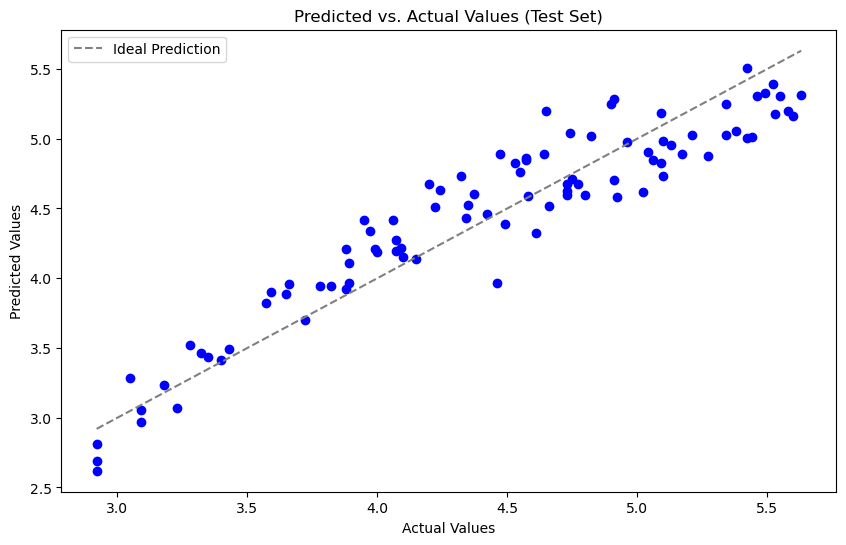

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat, marker='o', color='blue')
plt.title('Predicted vs. Actual Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', label='Ideal Prediction')
plt.legend()
plt.show()

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, yhat))
mae = mean_absolute_error(y_test, yhat)
rae = np.sum(np.abs(y_test - yhat.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.25708236475908003
RAE: 0.353193615378762
MAE: 0.22091793277989263
R2: 0.8808385200531758


### Neural Network Training
### Model 5: Three input features: Temp min and max, Wind speed

In [42]:
x_reduced4 = data[['Temp max','Wind speed', 'Temp min']].values
y = data['ETo'].values

# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train_reduced4, x_reduced4, y_train, y_ = train_test_split(x_reduced4, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv_reduced4, x_test_reduced4, y_cv, y_test = train_test_split(x_reduced4, y_, test_size=0.50, random_state=1)


In [43]:
scaler = StandardScaler()
x_train_scaled_reduced4 = scaler.fit_transform(x_train_reduced4)
x_cv_scaled__reduced4 = scaler.transform(x_cv_reduced4)
x_test_scaled_reduced4 = scaler.transform(x_test_reduced4)

In [44]:
lambdas = [0, 0.01, 0.03, 0.5]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(32, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(1, activation = 'linear')
        ]
    )
    models[i].compile(
        loss='mse',
        optimizer = 'adam',
        metrics = ['mae']
    )

    history = models[i].fit(
    x_train_scaled_reduced4, y_train,
    epochs=250
)
    print(f"Finished lambda = {lambda_}")

Epoch 1/250
9/9 [==============================] - 1s 3ms/step - loss: 18.0896 - mae: 4.1750
Epoch 2/250
9/9 [==============================] - 0s 5ms/step - loss: 17.0667 - mae: 4.0488
Epoch 3/250
9/9 [==============================] - 0s 3ms/step - loss: 16.0693 - mae: 3.9220
Epoch 4/250
9/9 [==============================] - 0s 4ms/step - loss: 15.0870 - mae: 3.7935
Epoch 5/250
9/9 [==============================] - 0s 4ms/step - loss: 14.1380 - mae: 3.6649
Epoch 6/250
9/9 [==============================] - 0s 4ms/step - loss: 13.2102 - mae: 3.5338
Epoch 7/250
9/9 [==============================] - 0s 4ms/step - loss: 12.2978 - mae: 3.4005
Epoch 8/250
9/9 [==============================] - 0s 10ms/step - loss: 11.4250 - mae: 3.2673
Epoch 9/250
9/9 [==============================] - 0s 4ms/step - loss: 10.5635 - mae: 3.1311
Epoch 10/250
9/9 [==============================] - 0s 11ms/step - loss: 9.7382 - mae: 2.9941
Epoch 11/250
9/9 [==============================] - 0s 5ms/step - lo

9/9 [==============================] - 0s 3ms/step - loss: 0.2226 - mae: 0.3567
Epoch 90/250
9/9 [==============================] - 0s 2ms/step - loss: 0.2172 - mae: 0.3523
Epoch 91/250
9/9 [==============================] - 0s 3ms/step - loss: 0.2121 - mae: 0.3480
Epoch 92/250
9/9 [==============================] - 0s 3ms/step - loss: 0.2073 - mae: 0.3436
Epoch 93/250
9/9 [==============================] - 0s 3ms/step - loss: 0.2023 - mae: 0.3398
Epoch 94/250
9/9 [==============================] - 0s 4ms/step - loss: 0.1979 - mae: 0.3364
Epoch 95/250
9/9 [==============================] - 0s 4ms/step - loss: 0.1932 - mae: 0.3329
Epoch 96/250
9/9 [==============================] - 0s 3ms/step - loss: 0.1886 - mae: 0.3293
Epoch 97/250
9/9 [==============================] - 0s 2ms/step - loss: 0.1844 - mae: 0.3259
Epoch 98/250
9/9 [==============================] - 0s 2ms/step - loss: 0.1802 - mae: 0.3222
Epoch 99/250
9/9 [==============================] - 0s 3ms/step - loss: 0.1764 - ma

9/9 [==============================] - 0s 2ms/step - loss: 0.0533 - mae: 0.1768
Epoch 177/250
9/9 [==============================] - 0s 3ms/step - loss: 0.0528 - mae: 0.1759
Epoch 178/250
9/9 [==============================] - 0s 3ms/step - loss: 0.0525 - mae: 0.1751
Epoch 179/250
9/9 [==============================] - 0s 3ms/step - loss: 0.0519 - mae: 0.1742
Epoch 180/250
9/9 [==============================] - 0s 2ms/step - loss: 0.0515 - mae: 0.1735
Epoch 181/250
9/9 [==============================] - 0s 2ms/step - loss: 0.0511 - mae: 0.1732
Epoch 182/250
9/9 [==============================] - 0s 3ms/step - loss: 0.0505 - mae: 0.1721
Epoch 183/250
9/9 [==============================] - 0s 3ms/step - loss: 0.0501 - mae: 0.1713
Epoch 184/250
9/9 [==============================] - 0s 3ms/step - loss: 0.0497 - mae: 0.1704
Epoch 185/250
9/9 [==============================] - 0s 3ms/step - loss: 0.0493 - mae: 0.1697
Epoch 186/250
9/9 [==============================] - 0s 3ms/step - loss: 0

9/9 [==============================] - 0s 3ms/step - loss: 5.4607 - mae: 2.2119
Epoch 14/250
9/9 [==============================] - 0s 3ms/step - loss: 4.8650 - mae: 2.0692
Epoch 15/250
9/9 [==============================] - 0s 3ms/step - loss: 4.3052 - mae: 1.9259
Epoch 16/250
9/9 [==============================] - 0s 4ms/step - loss: 3.7992 - mae: 1.7878
Epoch 17/250
9/9 [==============================] - 0s 5ms/step - loss: 3.3497 - mae: 1.6532
Epoch 18/250
9/9 [==============================] - 0s 7ms/step - loss: 2.9439 - mae: 1.5228
Epoch 19/250
9/9 [==============================] - 0s 4ms/step - loss: 2.5855 - mae: 1.4016
Epoch 20/250
9/9 [==============================] - 0s 3ms/step - loss: 2.2773 - mae: 1.2885
Epoch 21/250
9/9 [==============================] - 0s 4ms/step - loss: 2.0086 - mae: 1.1804
Epoch 22/250
9/9 [==============================] - 0s 3ms/step - loss: 1.7795 - mae: 1.0879
Epoch 23/250
9/9 [==============================] - 0s 4ms/step - loss: 1.5909 - ma

9/9 [==============================] - 0s 2ms/step - loss: 0.2599 - mae: 0.3416
Epoch 102/250
9/9 [==============================] - 0s 3ms/step - loss: 0.2561 - mae: 0.3381
Epoch 103/250
9/9 [==============================] - 0s 3ms/step - loss: 0.2523 - mae: 0.3344
Epoch 104/250
9/9 [==============================] - 0s 3ms/step - loss: 0.2485 - mae: 0.3310
Epoch 105/250
9/9 [==============================] - 0s 3ms/step - loss: 0.2443 - mae: 0.3282
Epoch 106/250
9/9 [==============================] - 0s 3ms/step - loss: 0.2406 - mae: 0.3253
Epoch 107/250
9/9 [==============================] - 0s 2ms/step - loss: 0.2372 - mae: 0.3228
Epoch 108/250
9/9 [==============================] - 0s 2ms/step - loss: 0.2334 - mae: 0.3196
Epoch 109/250
9/9 [==============================] - 0s 3ms/step - loss: 0.2297 - mae: 0.3164
Epoch 110/250
9/9 [==============================] - 0s 3ms/step - loss: 0.2263 - mae: 0.3133
Epoch 111/250
9/9 [==============================] - 0s 3ms/step - loss: 0

9/9 [==============================] - 0s 3ms/step - loss: 0.0862 - mae: 0.1680
Epoch 189/250
9/9 [==============================] - 0s 3ms/step - loss: 0.0855 - mae: 0.1670
Epoch 190/250
9/9 [==============================] - 0s 3ms/step - loss: 0.0847 - mae: 0.1658
Epoch 191/250
9/9 [==============================] - 0s 3ms/step - loss: 0.0841 - mae: 0.1652
Epoch 192/250
9/9 [==============================] - 0s 3ms/step - loss: 0.0833 - mae: 0.1641
Epoch 193/250
9/9 [==============================] - 0s 3ms/step - loss: 0.0828 - mae: 0.1636
Epoch 194/250
9/9 [==============================] - 0s 3ms/step - loss: 0.0820 - mae: 0.1624
Epoch 195/250
9/9 [==============================] - 0s 3ms/step - loss: 0.0814 - mae: 0.1617
Epoch 196/250
9/9 [==============================] - 0s 3ms/step - loss: 0.0809 - mae: 0.1610
Epoch 197/250
9/9 [==============================] - 0s 3ms/step - loss: 0.0802 - mae: 0.1599
Epoch 198/250
9/9 [==============================] - 0s 3ms/step - loss: 0

9/9 [==============================] - 0s 3ms/step - loss: 4.9883 - mae: 1.9938
Epoch 26/250
9/9 [==============================] - 0s 3ms/step - loss: 4.5906 - mae: 1.8912
Epoch 27/250
9/9 [==============================] - 0s 3ms/step - loss: 4.2070 - mae: 1.7933
Epoch 28/250
9/9 [==============================] - 0s 2ms/step - loss: 3.8574 - mae: 1.6992
Epoch 29/250
9/9 [==============================] - 0s 3ms/step - loss: 3.5341 - mae: 1.6075
Epoch 30/250
9/9 [==============================] - 0s 3ms/step - loss: 3.2360 - mae: 1.5197
Epoch 31/250
9/9 [==============================] - 0s 3ms/step - loss: 2.9639 - mae: 1.4366
Epoch 32/250
9/9 [==============================] - 0s 3ms/step - loss: 2.7135 - mae: 1.3564
Epoch 33/250
9/9 [==============================] - 0s 2ms/step - loss: 2.4900 - mae: 1.2835
Epoch 34/250
9/9 [==============================] - 0s 3ms/step - loss: 2.2930 - mae: 1.2140
Epoch 35/250
9/9 [==============================] - 0s 3ms/step - loss: 2.1172 - ma

9/9 [==============================] - 0s 4ms/step - loss: 0.3254 - mae: 0.3230
Epoch 114/250
9/9 [==============================] - 0s 6ms/step - loss: 0.3207 - mae: 0.3195
Epoch 115/250
9/9 [==============================] - 0s 6ms/step - loss: 0.3160 - mae: 0.3160
Epoch 116/250
9/9 [==============================] - 0s 4ms/step - loss: 0.3113 - mae: 0.3127
Epoch 117/250
9/9 [==============================] - 0s 4ms/step - loss: 0.3071 - mae: 0.3094
Epoch 118/250
9/9 [==============================] - 0s 5ms/step - loss: 0.3026 - mae: 0.3061
Epoch 119/250
9/9 [==============================] - 0s 5ms/step - loss: 0.2984 - mae: 0.3029
Epoch 120/250
9/9 [==============================] - 0s 5ms/step - loss: 0.2942 - mae: 0.2998
Epoch 121/250
9/9 [==============================] - 0s 5ms/step - loss: 0.2901 - mae: 0.2969
Epoch 122/250
9/9 [==============================] - 0s 4ms/step - loss: 0.2862 - mae: 0.2942
Epoch 123/250
9/9 [==============================] - 0s 4ms/step - loss: 0

9/9 [==============================] - 0s 5ms/step - loss: 0.1301 - mae: 0.1822
Epoch 201/250
9/9 [==============================] - 0s 4ms/step - loss: 0.1293 - mae: 0.1819
Epoch 202/250
9/9 [==============================] - 0s 4ms/step - loss: 0.1284 - mae: 0.1815
Epoch 203/250
9/9 [==============================] - 0s 4ms/step - loss: 0.1276 - mae: 0.1811
Epoch 204/250
9/9 [==============================] - 0s 4ms/step - loss: 0.1268 - mae: 0.1808
Epoch 205/250
9/9 [==============================] - 0s 4ms/step - loss: 0.1260 - mae: 0.1805
Epoch 206/250
9/9 [==============================] - 0s 4ms/step - loss: 0.1252 - mae: 0.1800
Epoch 207/250
9/9 [==============================] - 0s 5ms/step - loss: 0.1244 - mae: 0.1797
Epoch 208/250
9/9 [==============================] - 0s 4ms/step - loss: 0.1236 - mae: 0.1790
Epoch 209/250
9/9 [==============================] - 0s 5ms/step - loss: 0.1229 - mae: 0.1790
Epoch 210/250
9/9 [==============================] - 0s 5ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 2.8247 - mae: 0.8362
Epoch 38/250
9/9 [==============================] - 0s 4ms/step - loss: 2.6534 - mae: 0.7866
Epoch 39/250
9/9 [==============================] - 0s 4ms/step - loss: 2.4876 - mae: 0.7393
Epoch 40/250
9/9 [==============================] - 0s 4ms/step - loss: 2.3371 - mae: 0.6963
Epoch 41/250
9/9 [==============================] - 0s 4ms/step - loss: 2.1882 - mae: 0.6540
Epoch 42/250
9/9 [==============================] - 0s 4ms/step - loss: 2.0557 - mae: 0.6168
Epoch 43/250
9/9 [==============================] - 0s 5ms/step - loss: 1.9267 - mae: 0.5800
Epoch 44/250
9/9 [==============================] - 0s 5ms/step - loss: 1.8076 - mae: 0.5452
Epoch 45/250
9/9 [==============================] - 0s 4ms/step - loss: 1.6946 - mae: 0.5108
Epoch 46/250
9/9 [==============================] - 0s 5ms/step - loss: 1.5881 - mae: 0.4792
Epoch 47/250
9/9 [==============================] - 0s 4ms/step - loss: 1.4903 - ma

Epoch 125/250
9/9 [==============================] - 0s 4ms/step - loss: 0.0989 - mae: 0.1733
Epoch 126/250
9/9 [==============================] - 0s 5ms/step - loss: 0.0980 - mae: 0.1736
Epoch 127/250
9/9 [==============================] - 0s 4ms/step - loss: 0.0972 - mae: 0.1744
Epoch 128/250
9/9 [==============================] - 0s 4ms/step - loss: 0.0963 - mae: 0.1740
Epoch 129/250
9/9 [==============================] - 0s 4ms/step - loss: 0.0957 - mae: 0.1747
Epoch 130/250
9/9 [==============================] - 0s 4ms/step - loss: 0.0950 - mae: 0.1737
Epoch 131/250
9/9 [==============================] - 0s 4ms/step - loss: 0.0944 - mae: 0.1720
Epoch 132/250
9/9 [==============================] - 0s 4ms/step - loss: 0.0938 - mae: 0.1731
Epoch 133/250
9/9 [==============================] - 0s 4ms/step - loss: 0.0931 - mae: 0.1740
Epoch 134/250
9/9 [==============================] - 0s 5ms/step - loss: 0.0926 - mae: 0.1734
Epoch 135/250
9/9 [==============================] - 0s 4ms/

9/9 [==============================] - 0s 4ms/step - loss: 0.0833 - mae: 0.1736
Epoch 213/250
9/9 [==============================] - 0s 5ms/step - loss: 0.0831 - mae: 0.1744
Epoch 214/250
9/9 [==============================] - 0s 5ms/step - loss: 0.0831 - mae: 0.1743
Epoch 215/250
9/9 [==============================] - 0s 4ms/step - loss: 0.0832 - mae: 0.1728
Epoch 216/250
9/9 [==============================] - 0s 4ms/step - loss: 0.0830 - mae: 0.1720
Epoch 217/250
9/9 [==============================] - 0s 4ms/step - loss: 0.0831 - mae: 0.1738
Epoch 218/250
9/9 [==============================] - 0s 4ms/step - loss: 0.0830 - mae: 0.1745
Epoch 219/250
9/9 [==============================] - 0s 4ms/step - loss: 0.0830 - mae: 0.1735
Epoch 220/250
9/9 [==============================] - 0s 4ms/step - loss: 0.0831 - mae: 0.1738
Epoch 221/250
9/9 [==============================] - 0s 4ms/step - loss: 0.0831 - mae: 0.1728
Epoch 222/250
9/9 [==============================] - 0s 4ms/step - loss: 0

In [45]:
nn_train_mses = []
nn_cv_mses = []

for i in range(len(models)):
    yhat = models[i].predict(x_train_scaled_reduced4)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)

    # Record the cross validation MSEs 
    yhat = models[i].predict(x_cv_scaled__reduced4)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

    
# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
        )

3/3 [==============================] - 0s 3ms/step
RESULTS:
Model 1: Training MSE: 0.02, CV MSE: 0.02
Model 2: Training MSE: 0.02, CV MSE: 0.02
Model 3: Training MSE: 0.02, CV MSE: 0.02
Model 4: Training MSE: 0.02, CV MSE: 0.02


In [46]:
# Select the model with the lowest CV MSE
model_num = 4

# Compute the test MSE
yhat = models[model_num-1].predict(x_test_scaled_reduced4)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

3/3 [==============================] - 0s 3ms/step
Selected Model: 4
Training MSE: 0.02
Cross Validation MSE: 0.02
Test MSE: 0.02


In [47]:
comparison_df = pd.DataFrame({'Actual Values': y_test.flatten(), 'Predicted Values': yhat.flatten()})
pd.set_option('display.max_rows', None)

# Print the DataFrame
differences = np.absolute(y_test - yhat.flatten()).flatten()
df_differences = pd.DataFrame({'differences':differences})
comparison_df.head(7)

Actual Values  Predicted Values
0           4.09          4.129591
1           4.55          4.512676
2           3.59          3.645356
3           4.20          3.914783
4           4.22          3.981321
5           5.13          5.080308
6           5.06          5.197854

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, yhat))
mae = mean_absolute_error(y_test, yhat)
rae = np.sum(np.abs(y_test - yhat.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.21627925826190625
RAE: 0.2644356223450356
MAE: 0.16540098262869798
R2: 0.915662434755129


### Decision Tree 
### Model 1: All input features

Mean Squared Error on Validation Set for Decision Tree: 0.01
Mean Squared Error for Decision Tree: 0.01


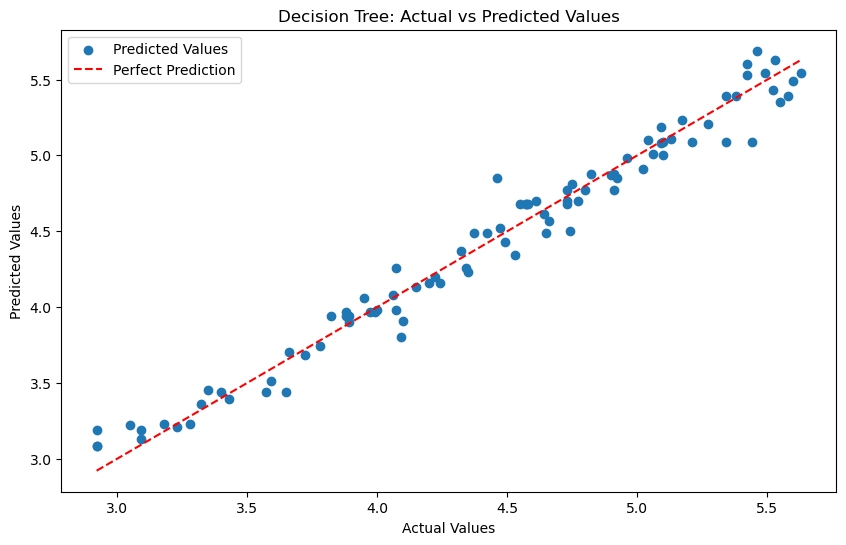

In [49]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=42)

# Fitting the model on the training data
tree.fit(x_train_scaled, y_train)

yhat_cv = tree.predict(x_cv_scaled)

# Evaluating the model
mse_cv = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Decision Tree: {mse_cv:.2f}")

# Predicting on the test set
yhat_test = tree.predict(x_test_scaled)

# Evaluating the model
mse_tree = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error for Decision Tree: {mse_tree:.2f}")

# Visualizing the predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Decision Tree: Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [50]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.12191854016015204
RAE: 0.15170793257425214
MAE: 0.09489130434782606
R2: 0.9732002449959004


### Decision Tree
### Model 2: Four input features: Temp min and max, Sun hours and Solar rad

Mean Squared Error on Validation Set for Decision Tree: 0.04
Mean Squared Error for Decision Tree: 0.03


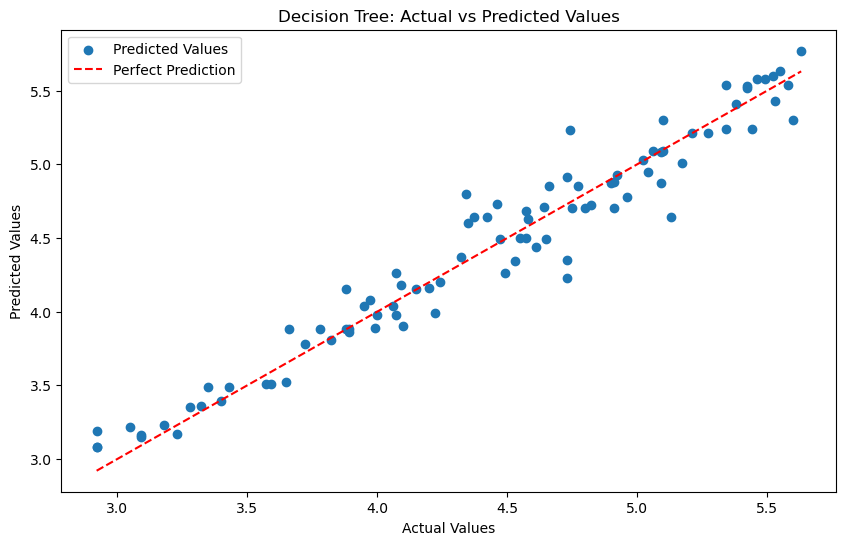

In [51]:
tree = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
tree.fit(x_train_scaled_reduced, y_train)

yhat_cv = tree.predict(x_cv_scaled__reduced)

# Evaluate the model
mse_cv = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Decision Tree: {mse_cv:.2f}")

# Predict on the test set
yhat_test = tree.predict(x_test_scaled_reduced)

# Evaluate the model
mse_tree = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error for Decision Tree: {mse_tree:.2f}")

# Visualize the predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Decision Tree: Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [52]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.16901569260818977
RAE: 0.20245102113287952
MAE: 0.1266304347826087
R2: 0.9484954763244795


### Decision Tree
### Model 3: Three input features: Temp max, Sun hours and Solar rad

Mean Squared Error on Validation Set for Decision Tree: 0.05
Mean Squared Error for Decision Tree: 0.04


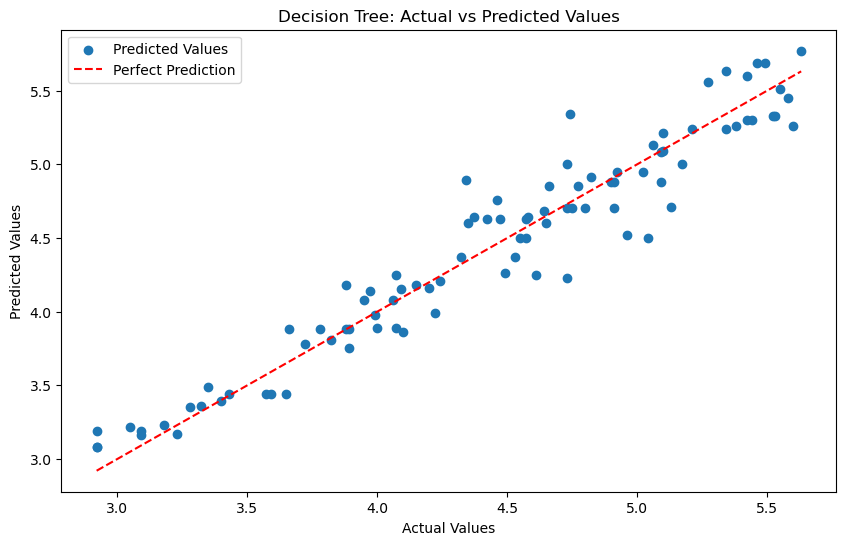

In [53]:
tree = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
tree.fit(x_train_scaled_reduced2, y_train)

yhat_cv = tree.predict(x_cv_scaled__reduced2)

# Evaluate the model
mse_cv = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Decision Tree: {mse_cv:.2f}")

# Predict on the test set
yhat_test = tree.predict(x_test_scaled_reduced2)

# Evaluate the model
mse_tree = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error for Decision Tree: {mse_tree:.2f}")

# Visualize the predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Decision Tree: Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [54]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.19933858022273906
RAE: 0.24207233685673918
MAE: 0.15141304347826087
R2: 0.928356954757962


### Decision Tree
### Model 4: Three input features: Temp min, Sun hours and Solar rad

Mean Squared Error on Validation Set for Decision Tree: 0.11
Mean Squared Error for Decision Tree: 0.13


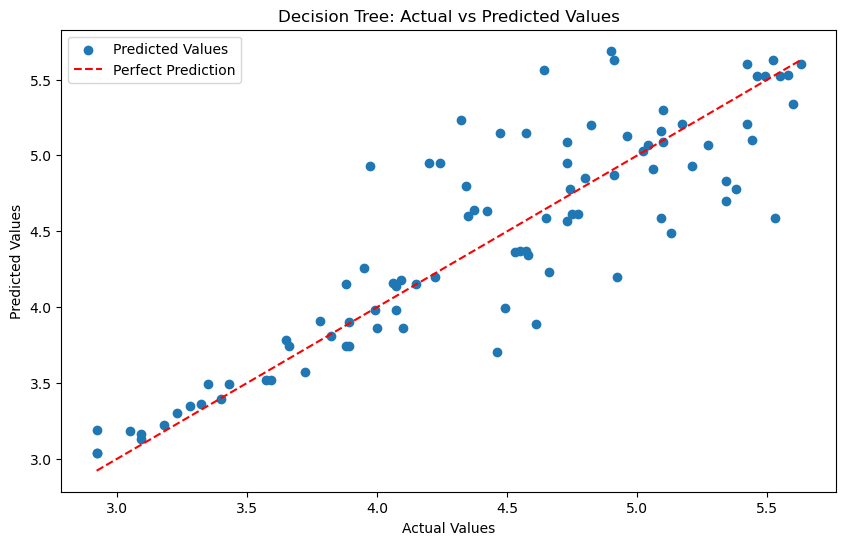

In [55]:
tree = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
tree.fit(x_train_scaled_reduced3, y_train)

yhat_cv = tree.predict(x_cv_scaled__reduced3)

# Evaluate the model
mse_cv = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Decision Tree: {mse_cv:.2f}")

# Predict on the test set
yhat_test = tree.predict(x_test_scaled_reduced3)

# Evaluate the model
mse_tree = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error for Decision Tree: {mse_tree:.2f}")

# Visualize the predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Decision Tree: Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [56]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.3645768840009279
RAE: 0.40785626317499407
MAE: 0.25510869565217387
R2: 0.7603543370262293


### Decision Tree
### Model 5: Three input features: Temp min, Temp max  and Wind speed

Mean Squared Error on Validation Set for Decision Tree: 0.04
Mean Squared Error for Decision Tree: 0.05


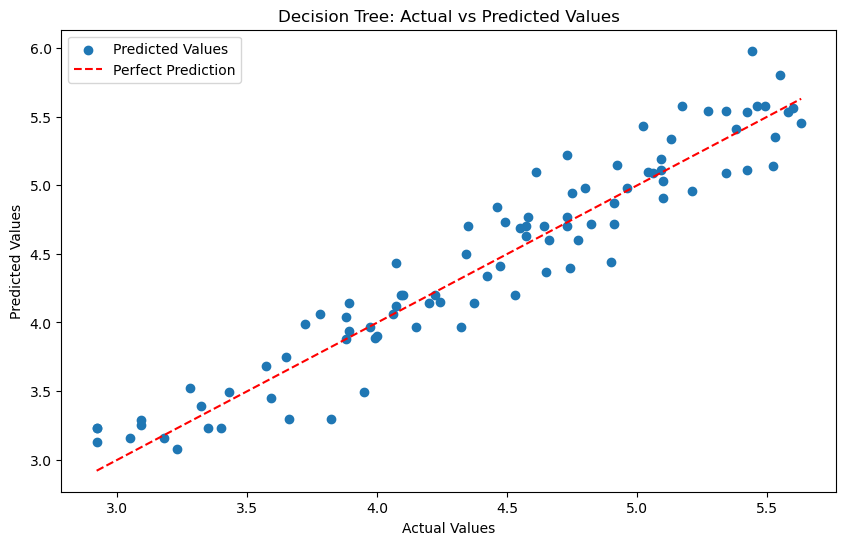

In [57]:
tree = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
tree.fit(x_train_scaled_reduced4, y_train)

yhat_cv = tree.predict(x_cv_scaled__reduced4)

# Evaluate the model
mse_cv = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Decision Tree: {mse_cv:.2f}")

# Predict on the test set
yhat_test = tree.predict(x_test_scaled_reduced4)

# Evaluate the model
mse_tree = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error for Decision Tree: {mse_tree:.2f}")

# Visualize the predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Decision Tree: Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [58]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.22717068855627137
RAE: 0.29229409231373676
MAE: 0.18282608695652175
R2: 0.9069543862460956


### Random Forest
### Model 1: All input features

Mean Squared Error on Validation Set for Random Forest: 0.04
Mean Squared Error on Test Set for Random Forest: 0.01


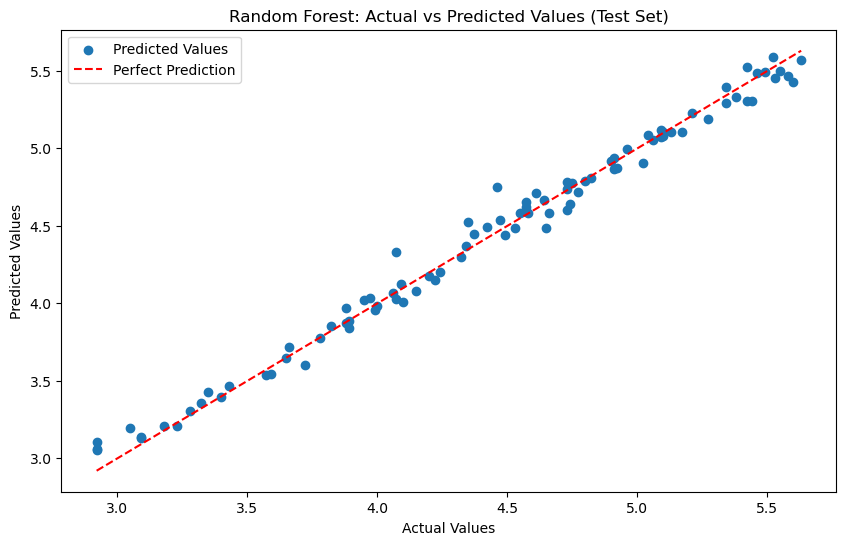

In [59]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(x_train_scaled, y_train)

# Predict on the validation set
yhat_val = rf_model.predict(x_cv_scaled)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Random Forest: {mse_val:.2f}")

# Predict on the test set
yhat_test = rf_model.predict(x_test_scaled)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for Random Forest: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Random Forest: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [60]:
feature_list = ['Temp min', 'Temp max', 'Wind speed', 'Sunlight hours','Solar Radiation']
x_train_df = pd.DataFrame(x_train_scaled, columns=feature_list)

# Get feature importances
feature_list = list(x_train_df.columns)
feature_imp = pd.Series(rf_model.feature_importances_, index=feature_list).sort_values(ascending=False)

# Print feature importances
print(feature_imp)

Temp max           0.742994
Solar Radiation    0.165243
Wind speed         0.059485
Sunlight hours     0.029079
Temp min           0.003199
dtype: float64


In [61]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.08169496751570055
RAE: 0.0979463253571894
MAE: 0.06126413043478303
R2: 0.987966778111129


### Random Forest
### Model 2: Four input features: Temp min and max, Sun hours and Solar rad

Mean Squared Error on Validation Set for Random Forest: 0.04
Mean Squared Error on Test Set for Random Forest: 0.02


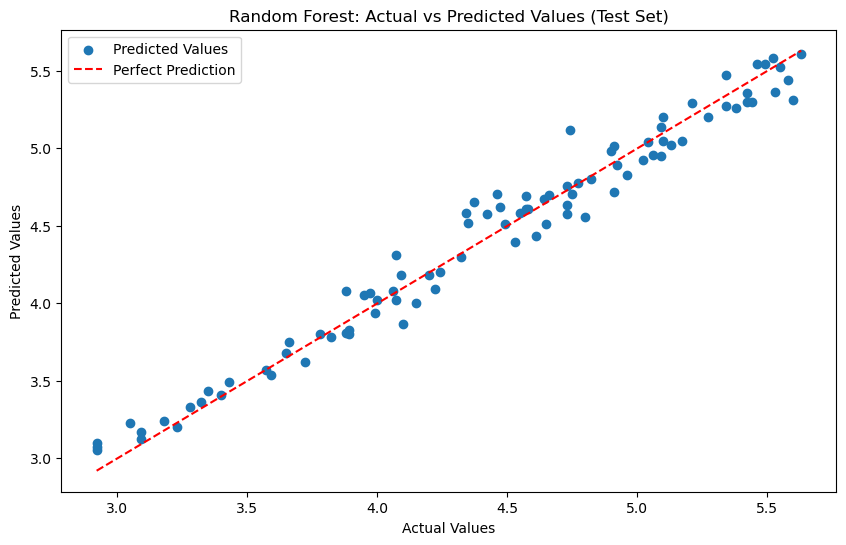

In [62]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(x_train_scaled_reduced, y_train)

# Predict on the validation set
yhat_val = rf_model.predict(x_cv_scaled__reduced)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Random Forest: {mse_val:.2f}")

# Predict on the test set
yhat_test = rf_model.predict(x_test_scaled_reduced)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for Random Forest: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Random Forest: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [63]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.12273190781395085
RAE: 0.15678050365310944
MAE: 0.09806413043478257
R2: 0.972841468297675


### Random Forest
### Model 3: Three input features: Temp max, Sun hours and Solar rad

Mean Squared Error on Validation Set for Random Forest: 0.04
Mean Squared Error on Test Set for Random Forest: 0.02


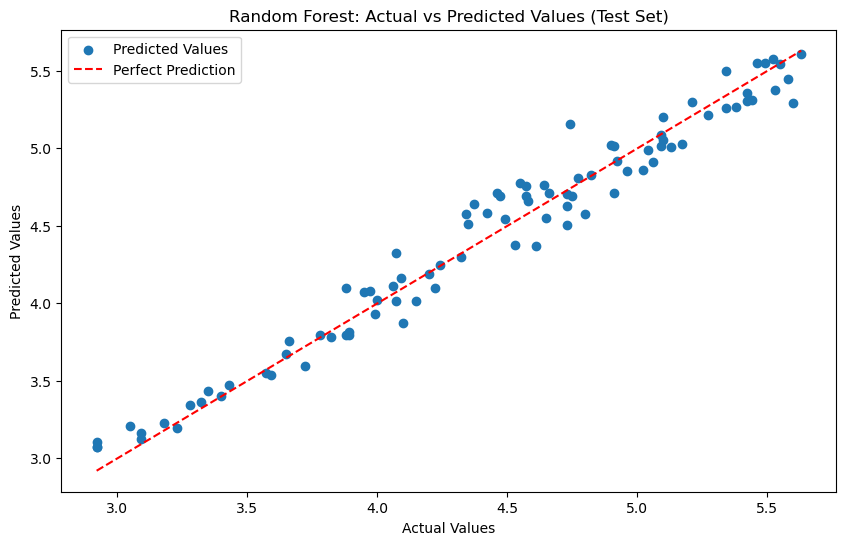

In [64]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(x_train_scaled_reduced2, y_train)

# Predict on the validation set
yhat_val = rf_model.predict(x_cv_scaled__reduced2)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Random Forest: {mse_val:.2f}")

# Predict on the test set
yhat_test = rf_model.predict(x_test_scaled_reduced2)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for Random Forest: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Random Forest: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [65]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.13387993566592796
RAE: 0.17304783420096265
MAE: 0.10823913043478264
R2: 0.9676836497700401


### Random Forest
### Model 4: Three input features: Temp min, Sun hours and Solar rad

Mean Squared Error on Validation Set for Random Forest: 0.04
Mean Squared Error on Test Set for Random Forest: 0.05


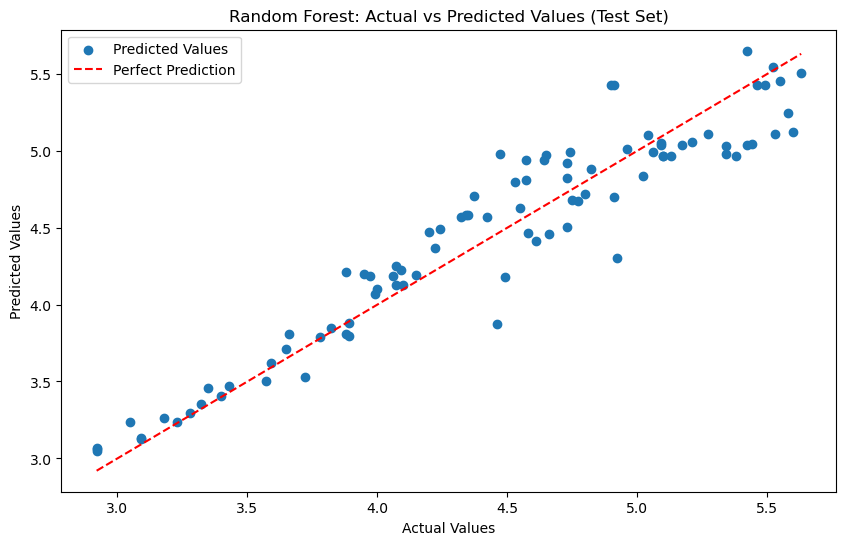

In [66]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(x_train_scaled_reduced3, y_train)

# Predict on the validation set
yhat_val = rf_model.predict(x_cv_scaled__reduced3)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Random Forest: {mse_val:.2f}")

# Predict on the test set
yhat_test = rf_model.predict(x_test_scaled_reduced3)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for Random Forest: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Random Forest: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [67]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.23002587637991484
RAE: 0.28761773439211813
MAE: 0.17990108695652177
R2: 0.9046008062847204


### Random Forest
### Model 5: Three input features: Temp min and max, Wind speed

Mean Squared Error on Validation Set for Random Forest: 0.04
Mean Squared Error on Test Set for Random Forest: 0.04


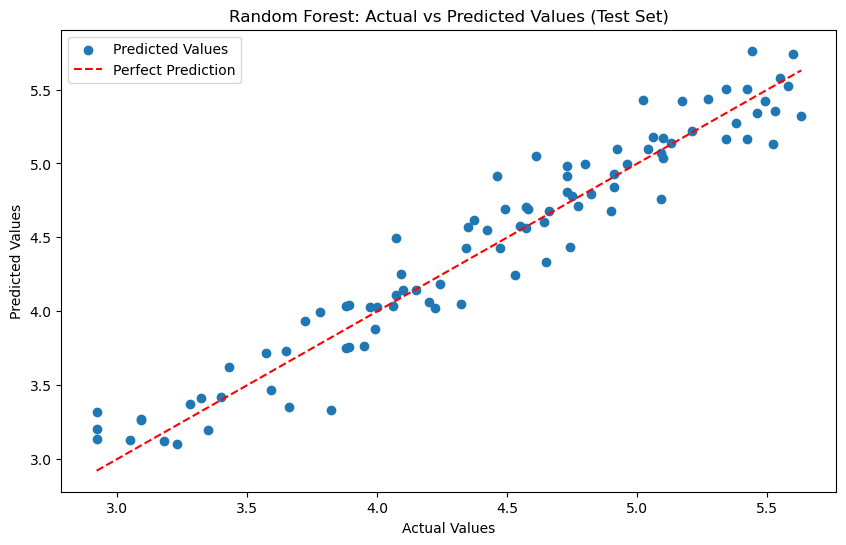

In [68]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(x_train_scaled_reduced4, y_train)

# Predict on the validation set
yhat_val = rf_model.predict(x_cv_scaled__reduced4)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Random Forest: {mse_val:.2f}")

# Predict on the test set
yhat_test = rf_model.predict(x_test_scaled_reduced4)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for Random Forest: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Random Forest: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [69]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.19444276010312608
RAE: 0.24776876988054708
MAE: 0.15497608695652196
R2: 0.9318328918009257


### Xgboost 
### Model 1: All input features

Mean Squared Error on Validation Set for XGBoost: 0.01
Mean Squared Error on Test Set for XGBoost: 0.01


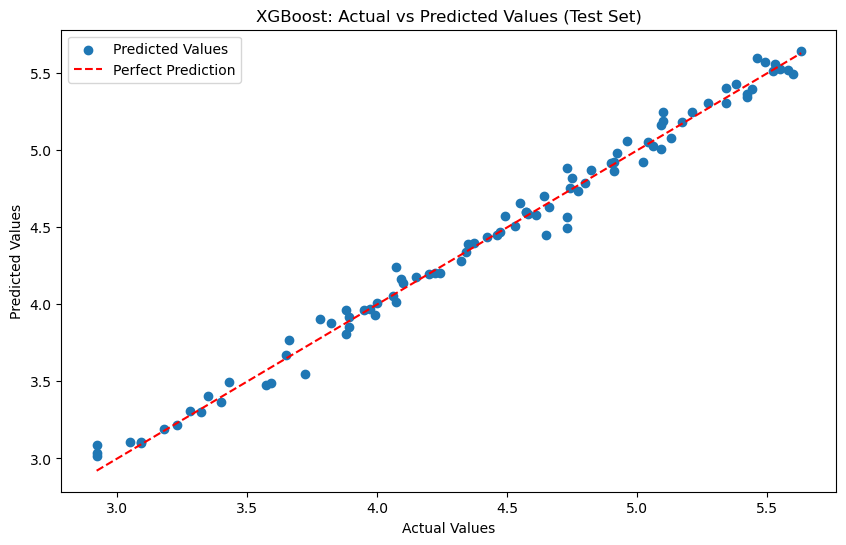

In [70]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(random_state=42)

# Fit the model on the training data
xgb_model.fit(x_train_scaled, y_train)

# Predict on the validation set
yhat_cv = xgb_model.predict(x_cv_scaled)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for XGBoost: {mse_val:.2f}")

# Predict on the test set
yhat_test = xgb_model.predict(x_test_scaled)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for XGBoost: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('XGBoost: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [71]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.07561237718743952
RAE: 0.0914605966015343
MAE: 0.05720739292061847
R2: 0.9896919361395918


### Xgboost
### Model 2: Four input features: Temp min and max, Sun hours and Solar rad

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Mean Squared Error on Validation Set for XGBoost: 0.02
Mean Squared Error on Test Set for XGBoost: 0.01


Text(0, 0.5, 'Predicted Values')

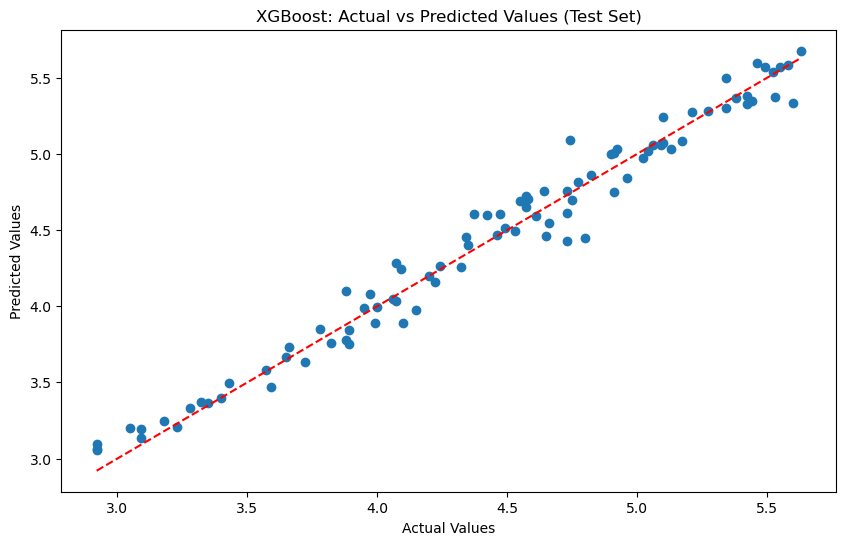

In [72]:
# Define the parameter grid to search
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Instantiate an XGBoost regressor
xgb_model = XGBRegressor(random_state=42)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the XGBoost model with the best parameters
best_model = XGBRegressor(**best_params, random_state=42)
best_model.fit(x_train_scaled_reduced, y_train)

# Make predictions on the validation set
yhat_cv = best_model.predict(x_cv_scaled__reduced)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for XGBoost: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_model.predict(x_test_scaled_reduced)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for XGBoost: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('XGBoost: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [73]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.11909090067323314
RAE: 0.1472560374318667
MAE: 0.09210670284602954
R2: 0.974428955041863


### Xgboost
### Model 3: Three input features: Temp max, Sun hours and Solar rad

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.9}
Mean Squared Error on Validation Set for XGBoost: 0.02
Mean Squared Error on Test Set for XGBoost: 0.02


Text(0, 0.5, 'Predicted Values')

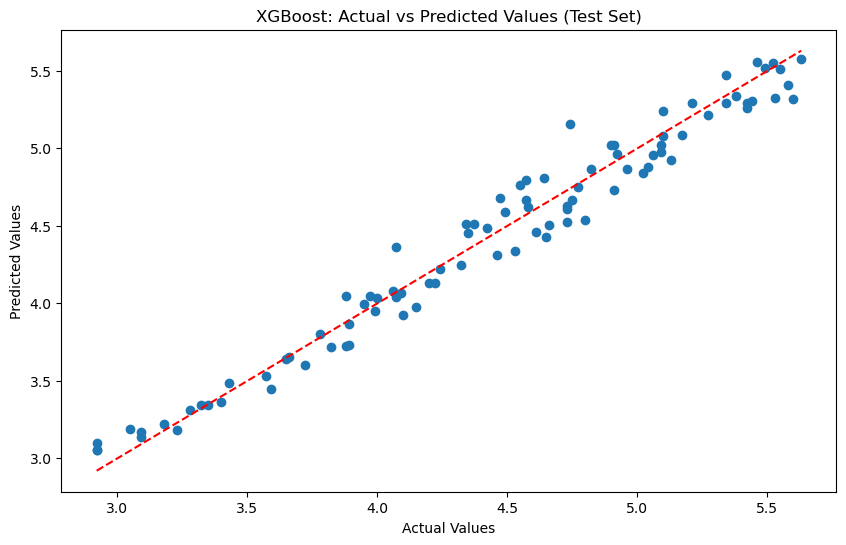

In [74]:
xgb_model = XGBRegressor(random_state=42)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced2, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the XGBoost model with the best parameters
best_model = XGBRegressor(**best_params, random_state=42)
best_model.fit(x_train_scaled_reduced2, y_train)

# Make predictions on the validation set
yhat_cv = best_model.predict(x_cv_scaled__reduced2)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for XGBoost: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_model.predict(x_test_scaled_reduced2)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for XGBoost: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('XGBoost: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [75]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.13252571580249936
RAE: 0.17402709962436255
MAE: 0.10885164799897569
R2: 0.9683341147645054


### Xgboost
### Model 4: Three input features: Temp min, Sun hours and Solar rad

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.9}
Mean Squared Error on Validation Set for XGBoost: 0.06
Mean Squared Error on Test Set for XGBoost: 0.05


Text(0, 0.5, 'Predicted Values')

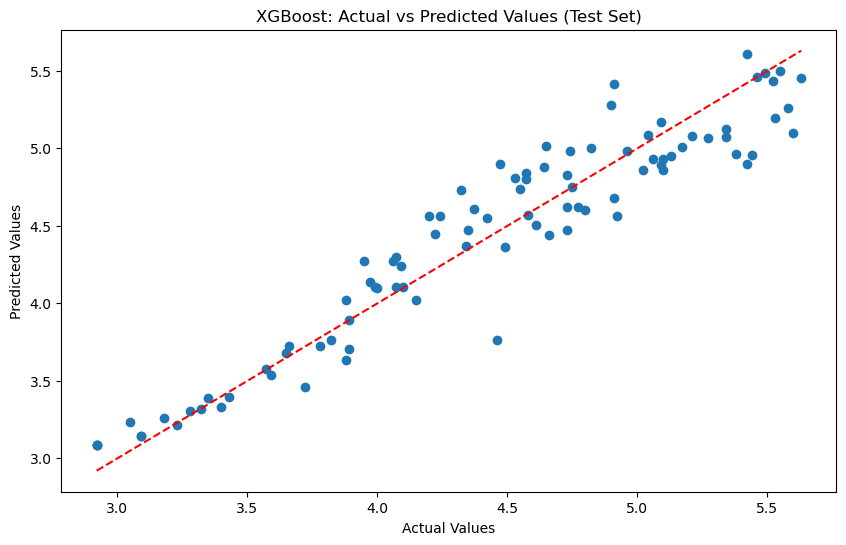

In [76]:
xgb_model = XGBRegressor(random_state=42)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced3, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the XGBoost model with the best parameters
best_model = XGBRegressor(**best_params, random_state=42)
best_model.fit(x_train_scaled_reduced3, y_train)

# Make predictions on the validation set
yhat_cv = best_model.predict(x_cv_scaled__reduced3)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for XGBoost: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_model.predict(x_test_scaled_reduced3)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for XGBoost: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('XGBoost: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [77]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.22859879874406744
RAE: 0.28916495930038605
MAE: 0.18086885566296781
R2: 0.9057808452104815


### Xgboost
### Model 5: Three input features: Temp min and max, wind speed

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Mean Squared Error on Validation Set for XGBoost: 0.03
Mean Squared Error on Test Set for XGBoost: 0.03


Text(0, 0.5, 'Predicted Values')

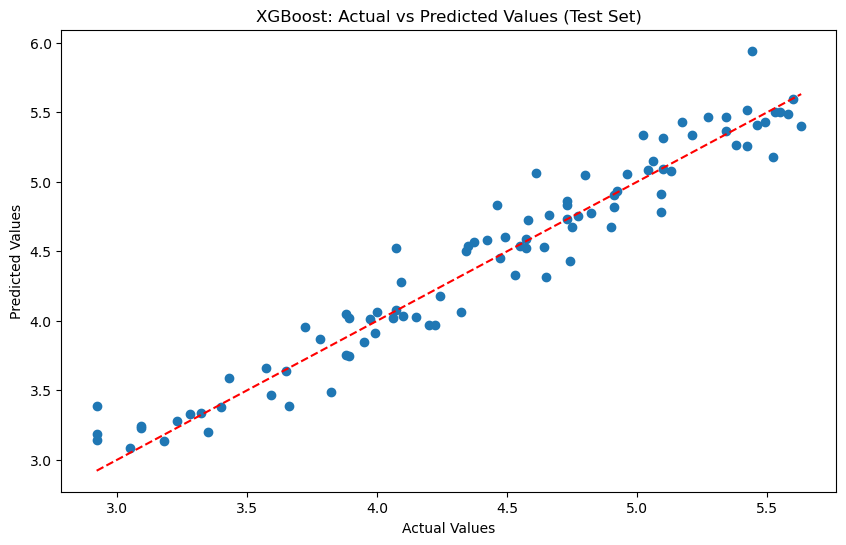

In [78]:
xgb_model = XGBRegressor(random_state=42)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced4, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the XGBoost model with the best parameters
best_model = XGBRegressor(**best_params, random_state=42)
best_model.fit(x_train_scaled_reduced4, y_train)

# Make predictions on the validation set
yhat_cv = best_model.predict(x_cv_scaled__reduced4)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for XGBoost: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_model.predict(x_test_scaled_reduced4)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for XGBoost: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('XGBoost: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [79]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.1838696919346045
RAE: 0.2276846579006331
MAE: 0.1424137406763823
R2: 0.9390446803502331


### SVR
### Model 1: All input features

Best Parameters: {'C': 1, 'epsilon': 0.01, 'kernel': 'linear'}
Mean Squared Error on Validation Set for SVR: 0.00
Mean Squared Error on Test Set for SVR: 0.00


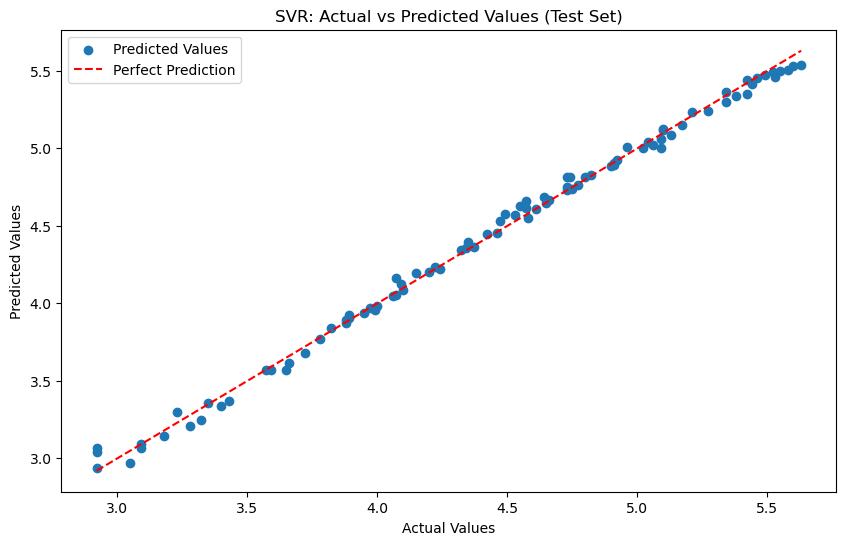

In [80]:
from sklearn.svm import SVR
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
}

# Instantiate an SVR model
svr_model = SVR()

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svr_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the SVR model with the best parameters
best_svr_model = SVR(**best_params)
best_svr_model.fit(x_train_scaled, y_train)

# Make predictions on the validation set
yhat_val = best_svr_model.predict(x_cv_scaled)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_val)
print(f"Mean Squared Error on Validation Set for SVR: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_svr_model.predict(x_test_scaled)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for SVR: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('SVR: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [81]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.04653637112354719
RAE: 0.05672819330820519
MAE: 0.03548273425766012
R2: 0.9960954018451214


### SVR
### Model 2: Four input features: Temp min and max, Sun hours and Solar rad

Best Parameters: {'C': 10, 'epsilon': 0.1, 'kernel': 'rbf'}
Mean Squared Error on Validation Set for SVR: 0.02
Mean Squared Error on Test Set for SVR: 0.02


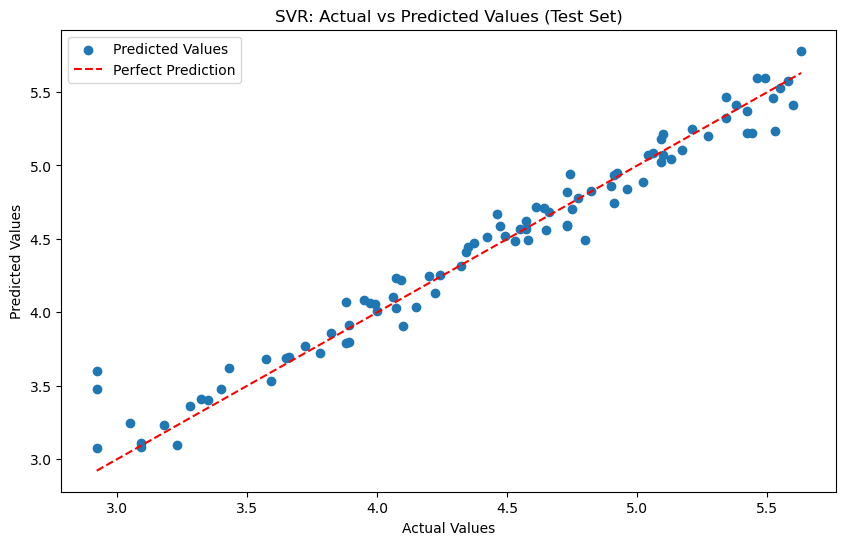

In [82]:
from sklearn.svm import SVR
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
}

# Instantiate an SVR model
svr_model = SVR()

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svr_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the SVR model with the best parameters
best_svr_model = SVR(**best_params)
best_svr_model.fit(x_train_scaled_reduced, y_train)

# Make predictions on the validation set
yhat_val = best_svr_model.predict(x_cv_scaled__reduced)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_val)
print(f"Mean Squared Error on Validation Set for SVR: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_svr_model.predict(x_test_scaled_reduced)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for SVR: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('SVR: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [83]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.14119319988946602
RAE: 0.15759098170447725
MAE: 0.09857107373125083
R2: 0.9640566230194055


### SVR
### Model 3: Three input features: Temp max, Sun hours and Solar rad

Best Parameters: {'C': 10, 'epsilon': 0.1, 'kernel': 'rbf'}
Mean Squared Error on Validation Set for SVR: 0.02
Mean Squared Error on Test Set for SVR: 0.02


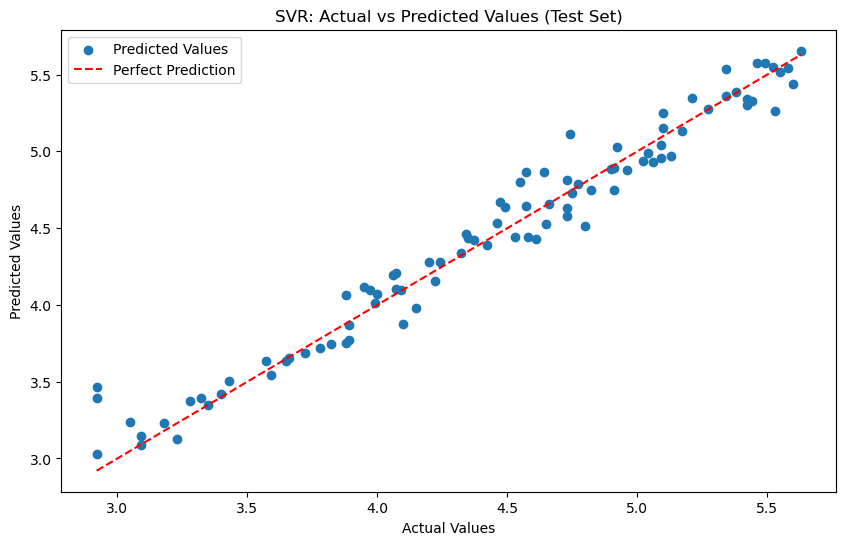

In [84]:
from sklearn.svm import SVR
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
}

# Instantiate an SVR model
svr_model = SVR()

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svr_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced2, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the SVR model with the best parameters
best_svr_model = SVR(**best_params)
best_svr_model.fit(x_train_scaled_reduced2, y_train)

# Make predictions on the validation set
yhat_val = best_svr_model.predict(x_cv_scaled__reduced2)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_val)
print(f"Mean Squared Error on Validation Set for SVR: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_svr_model.predict(x_test_scaled_reduced2)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for SVR: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('SVR: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [85]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.14222466780924373
RAE: 0.16858993862009147
MAE: 0.1054507757381142
R2: 0.9635295457737582


### SVR
### Model 4: Three input features: Temp min, Sun hours and Solar rad

Best Parameters: {'C': 10, 'epsilon': 0.1, 'kernel': 'rbf'}
Mean Squared Error on Validation Set for SVR: 0.05
Mean Squared Error on Test Set for SVR: 0.05


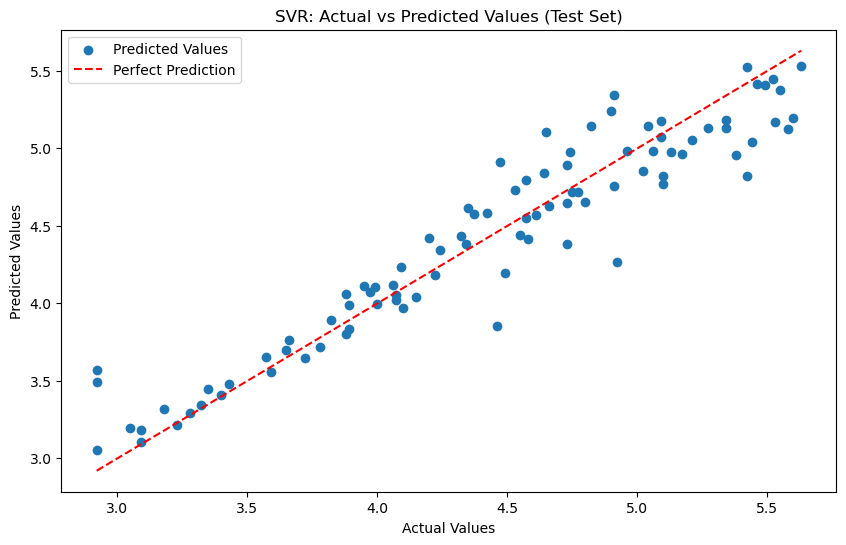

In [86]:
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
}

# Instantiate an SVR model
svr_model = SVR()

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svr_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced3, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the SVR model with the best parameters
best_svr_model = SVR(**best_params)
best_svr_model.fit(x_train_scaled_reduced3, y_train)

# Make predictions on the validation set
yhat_val = best_svr_model.predict(x_cv_scaled__reduced3)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_val)
print(f"Mean Squared Error on Validation Set for SVR: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_svr_model.predict(x_test_scaled_reduced3)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for SVR: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('SVR: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [87]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.23410256987161282
RAE: 0.2774433377752519
MAE: 0.1735371365055194
R2: 0.901189367652899


### SVR
### Model 5: Three input features: Temp min and max, Wind speed

Best Parameters: {'C': 10, 'epsilon': 0.1, 'kernel': 'rbf'}
Mean Squared Error on Validation Set for SVR: 0.02
Mean Squared Error on Test Set for SVR: 0.03


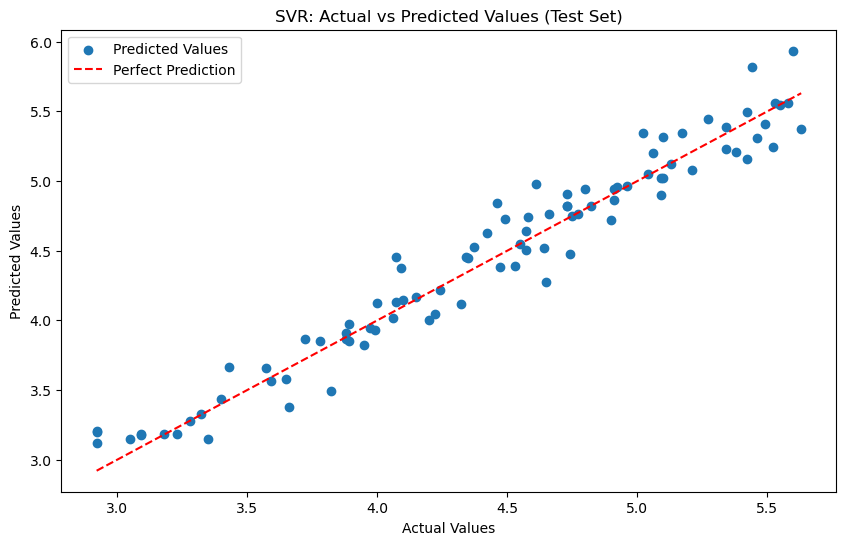

In [88]:
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
}

# Instantiate an SVR model
svr_model = SVR()

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svr_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced4, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the SVR model with the best parameters
best_svr_model = SVR(**best_params)
best_svr_model.fit(x_train_scaled_reduced4, y_train)

# Make predictions on the validation set
yhat_val = best_svr_model.predict(x_cv_scaled__reduced4)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_val)
print(f"Mean Squared Error on Validation Set for SVR: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_svr_model.predict(x_test_scaled_reduced4)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for SVR: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('SVR: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [89]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.1687759692377705
RAE: 0.2088086809955683
MAE: 0.13060706689889626
R2: 0.9486414755716436
